# Chapter 7 - Choosing the Right Model

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 600

In [4]:
df = pd.read_csv('../raw_data/kc_house_data/kc_house_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
hist = df.hist(bins=50, figsize=(40,30))

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state  = 1)

In [8]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

<AxesSubplot:xlabel='long', ylabel='lat'>

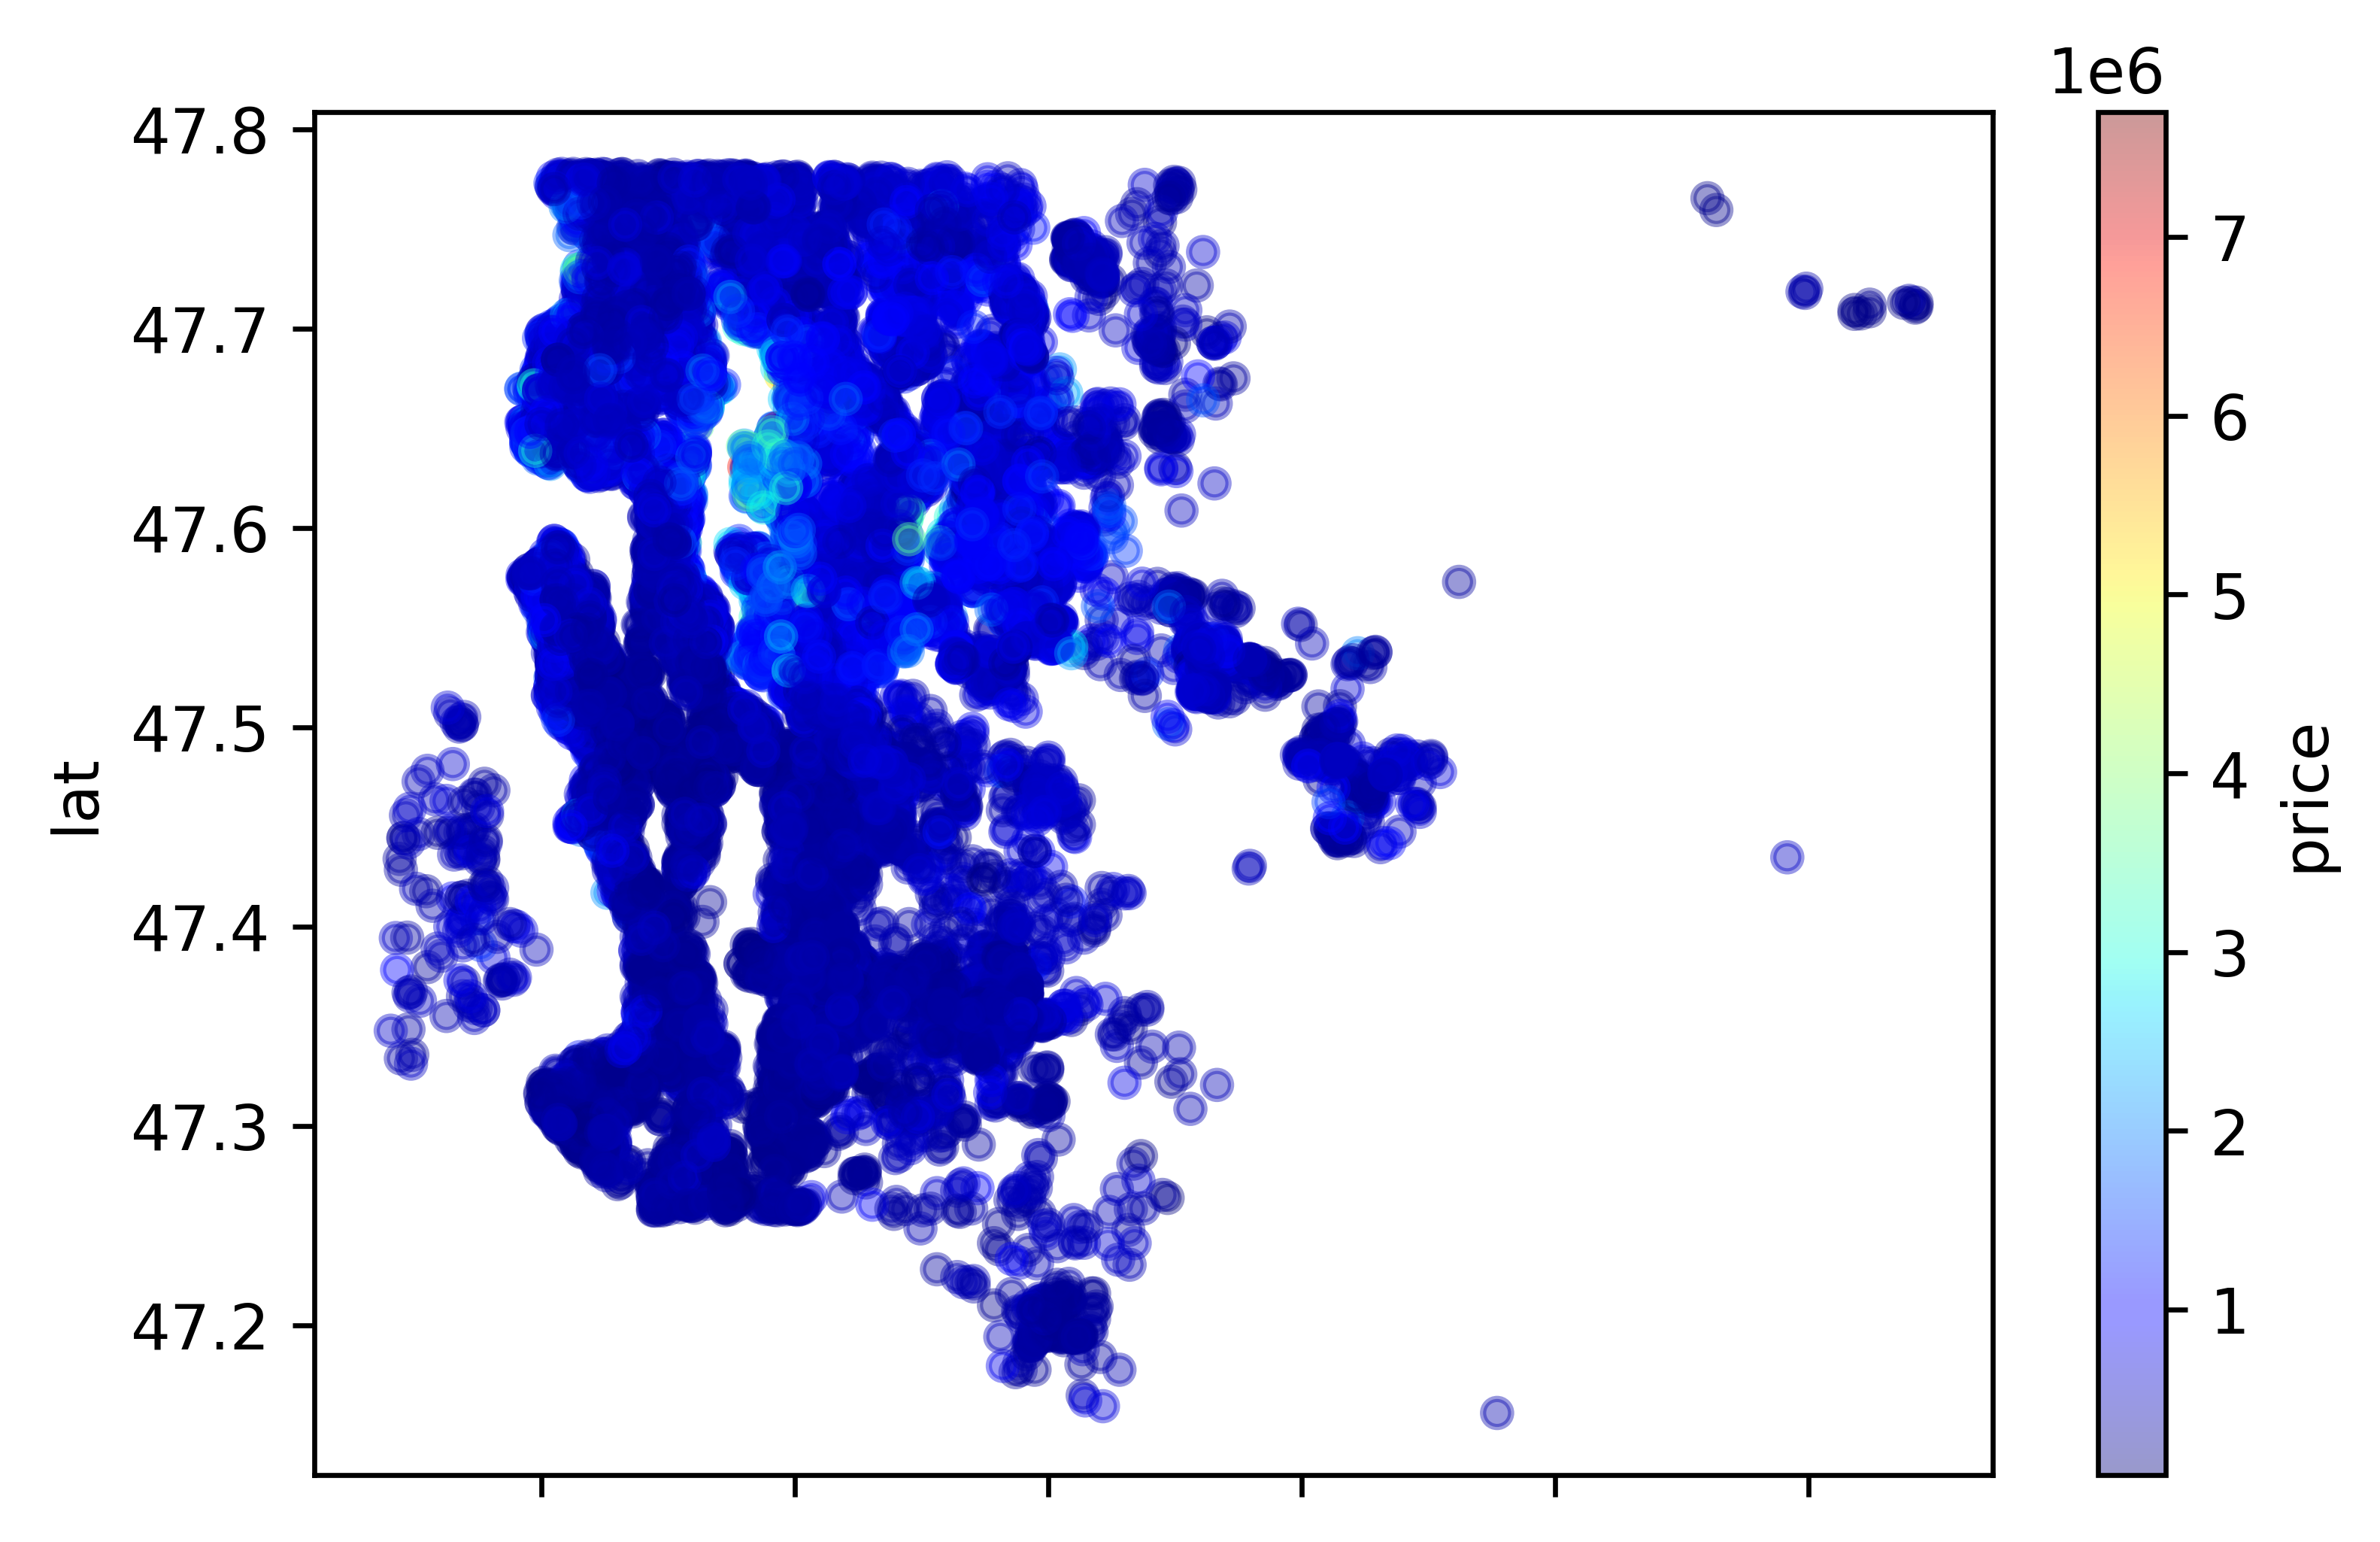

In [9]:
df.plot(kind = 'scatter', x='long', y='lat', alpha=0.4, 
#         s='sqft_living'/100,
         c='price', cmap=plt.get_cmap("jet"))

In [10]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

## Linear Regression

In [11]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

training_data = df.drop('price',1)
training_data.drop('date',1, inplace=True)
target = df['price']

C:\Users\Dan\AppData\Local\Temp\ipykernel_21756\1872206104.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_data = df.drop('price',1)
C:\Users\Dan\AppData\Local\Temp\ipykernel_21756\1872206104.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_data.drop('date',1, inplace=True)


In [12]:
target.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [13]:
train_features, test_features, train_target, test_target = train_test_split(training_data, target, test_size = 0.2, random_state=5) 
train_features

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3856   8556800100         4       2.50         2880     23994     2.0   
5010   8132700185         2       1.00          620      4455     1.0   
18050  7701961220         4       2.50         2990     16809     2.0   
570    5104510270         4       2.50         1830      5612     2.0   
8556   8965500880         4       2.50         3320      9380     2.0   
...           ...       ...        ...          ...       ...     ...   
5520   2877101100         3       1.75         2100      5000     1.5   
3046   9206200110         3       1.00         1330     10500     1.0   
20463  2011400401         3       2.50         2730      7136     2.0   
18638  1189000910         2       1.50         1920      3408     1.0   
2915   8965000110         3       1.75         1300      9600     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
3856            0     3          3      9        2880              0   
5010            0     0          3      6         620              0   
18050           0     0          3     11        2990              0   
570             0     0          3      7        1830              0   
8556            0     3          3     10        3320              0   
...           ...   ...        ...    ...         ...            ...   
5520            0     0          3      8        2100              0   
3046            0     0          3      7         960            370   
20463           0     0          3      8        2730              0   
18638           0     0          4      7         960            960   
2915            0     0          4      7        1300              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
3856       2002             0    98022  47.2124 -122.005           2470   
5010       1927             0    98117  47.6877 -122.395           1180   
18050      1990             0    98077  47.7123 -122.073           3340   
570        2003             0    98038  47.3572 -122.015           1830   
8556       1988             0    98006  47.5655 -122.114           2870   
...         ...           ...      ...      ...      ...            ...   
5520       1916             0    98117  47.6776 -122.360           1830   
3046       1963             0    98034  47.7204 -122.196           1460   
20463      2012             0    98198  47.3938 -122.321           2130   
18638      1912             0    98122  47.6118 -122.299           1130   
2915       1969             0    98052  47.6388 -122.103           2070   

       sqft_lot15  
3856        17009  
5010         5000  
18050       18752  
570          5998  
8556        11779  
...           ...  
5520         4200  
3046        11550  
20463        8932  
18638        3408  
2915         9775  

[17290 rows x 19 columns]

In [14]:
regr = linear_model.LinearRegression()
regr.fit(train_features,train_target)

LinearRegression()

In [15]:
y_predict = regr.predict(test_features)

In [16]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
print(data.feature_names)
print(data.data[:5])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]


## SVMs

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X,diabetes_y = datasets.load_diabetes(as_frame=True, return_X_y = True)

# diabetes_y = pd.DataFrame(diabetes_target,columns=['severity'])
# print(diabetes_y)


# df = pd.merge(diabetes_X,diabetes_y, left_index=True, right_index=True)
df.head()
df.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

### Use Diabetes dataset

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets


data = datasets.load_diabetes(as_frame=True)

diabetes_X = pd.DataFrame(data['data'])

diabetes_y = data['target']

train_features, test_features, train_target, test_target = train_test_split(diabetes_X, diabetes_y, test_size=.2, random_state=33)

train_target.head()

114    258.0
363     58.0
1       75.0
343    113.0
258     89.0
Name: target, dtype: float64

[200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200.]


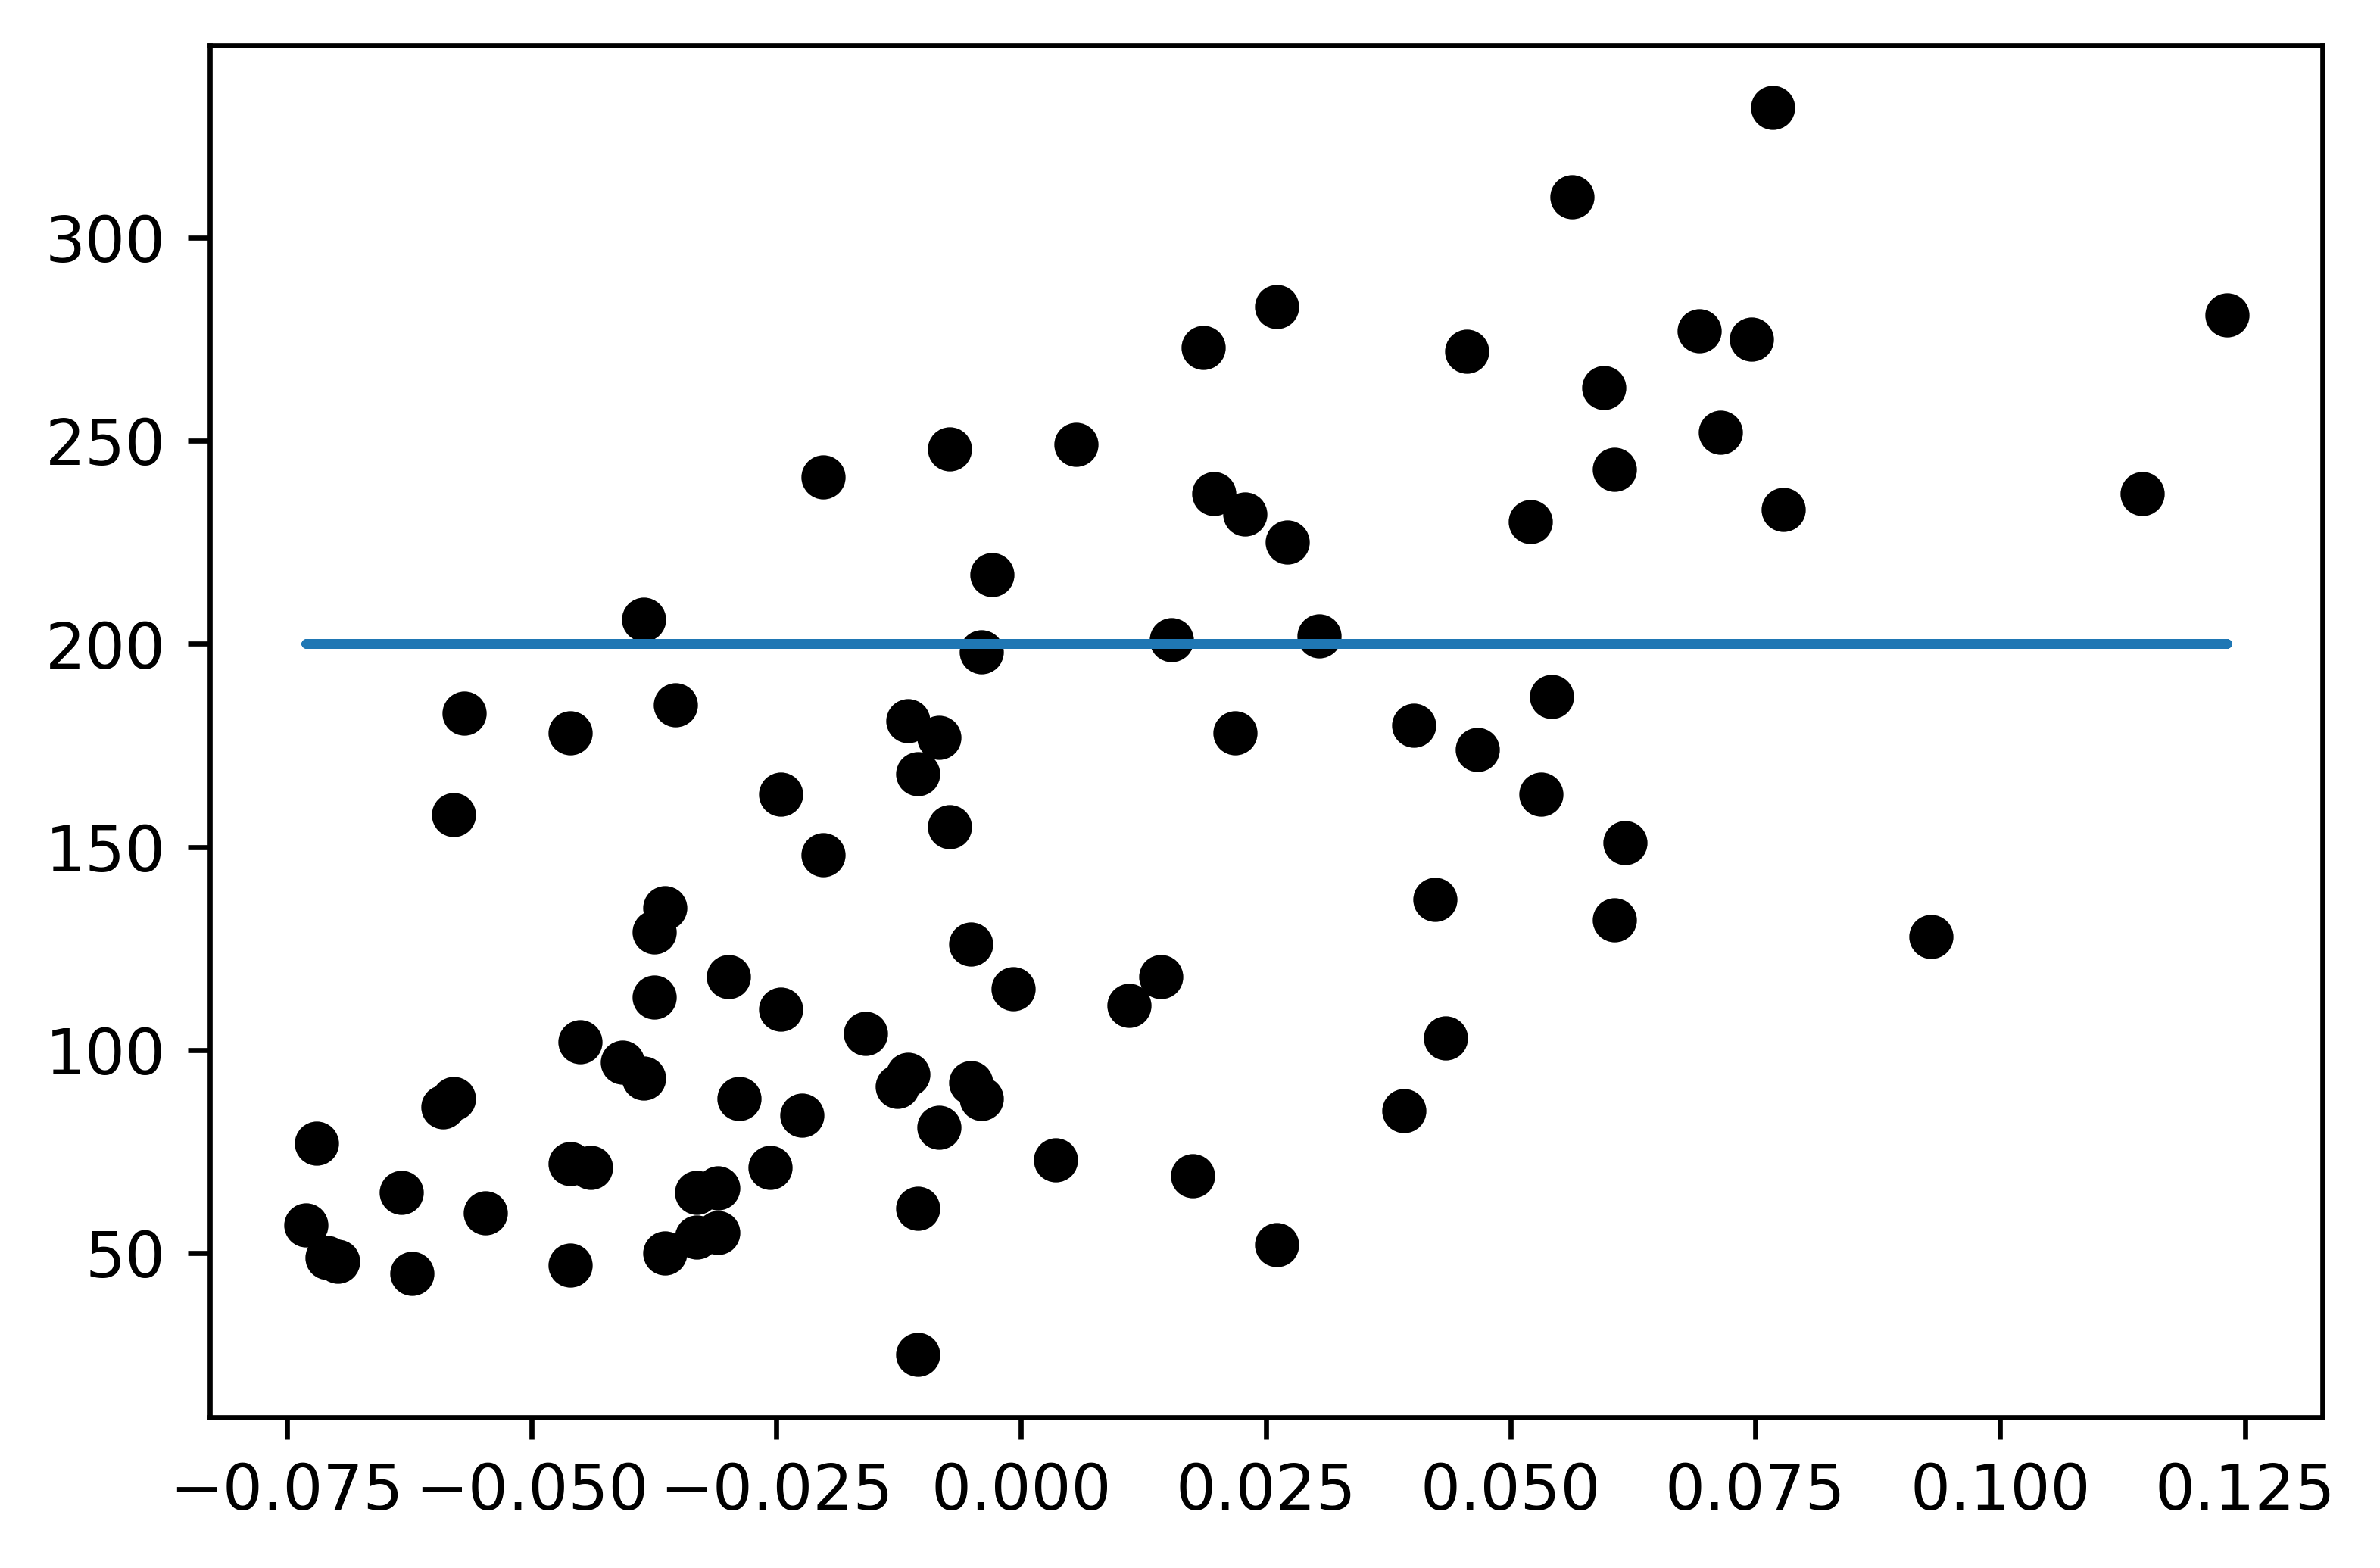

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(train_features, train_target)
pred = clf.predict(test_features)

# Plot outputs
plt.scatter(test_features.bmi, test_target, color="black")
plt.plot(test_features.bmi, pred)

print(pred)


# print(data.feature_names)
# print(data.target)
# print(data.data[:5])

## Random Forest

### Reload data to make sure its clean

In [20]:
data = datasets.load_diabetes(as_frame=True)

diabetes_features = pd.DataFrame(data['data'])

diabetes_target = data['target']

train_features, test_features, train_target, test_target = train_test_split(diabetes_features, diabetes_target, test_size=.2, random_state=33)


In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 33)
rf.fit(train_features, train_target);

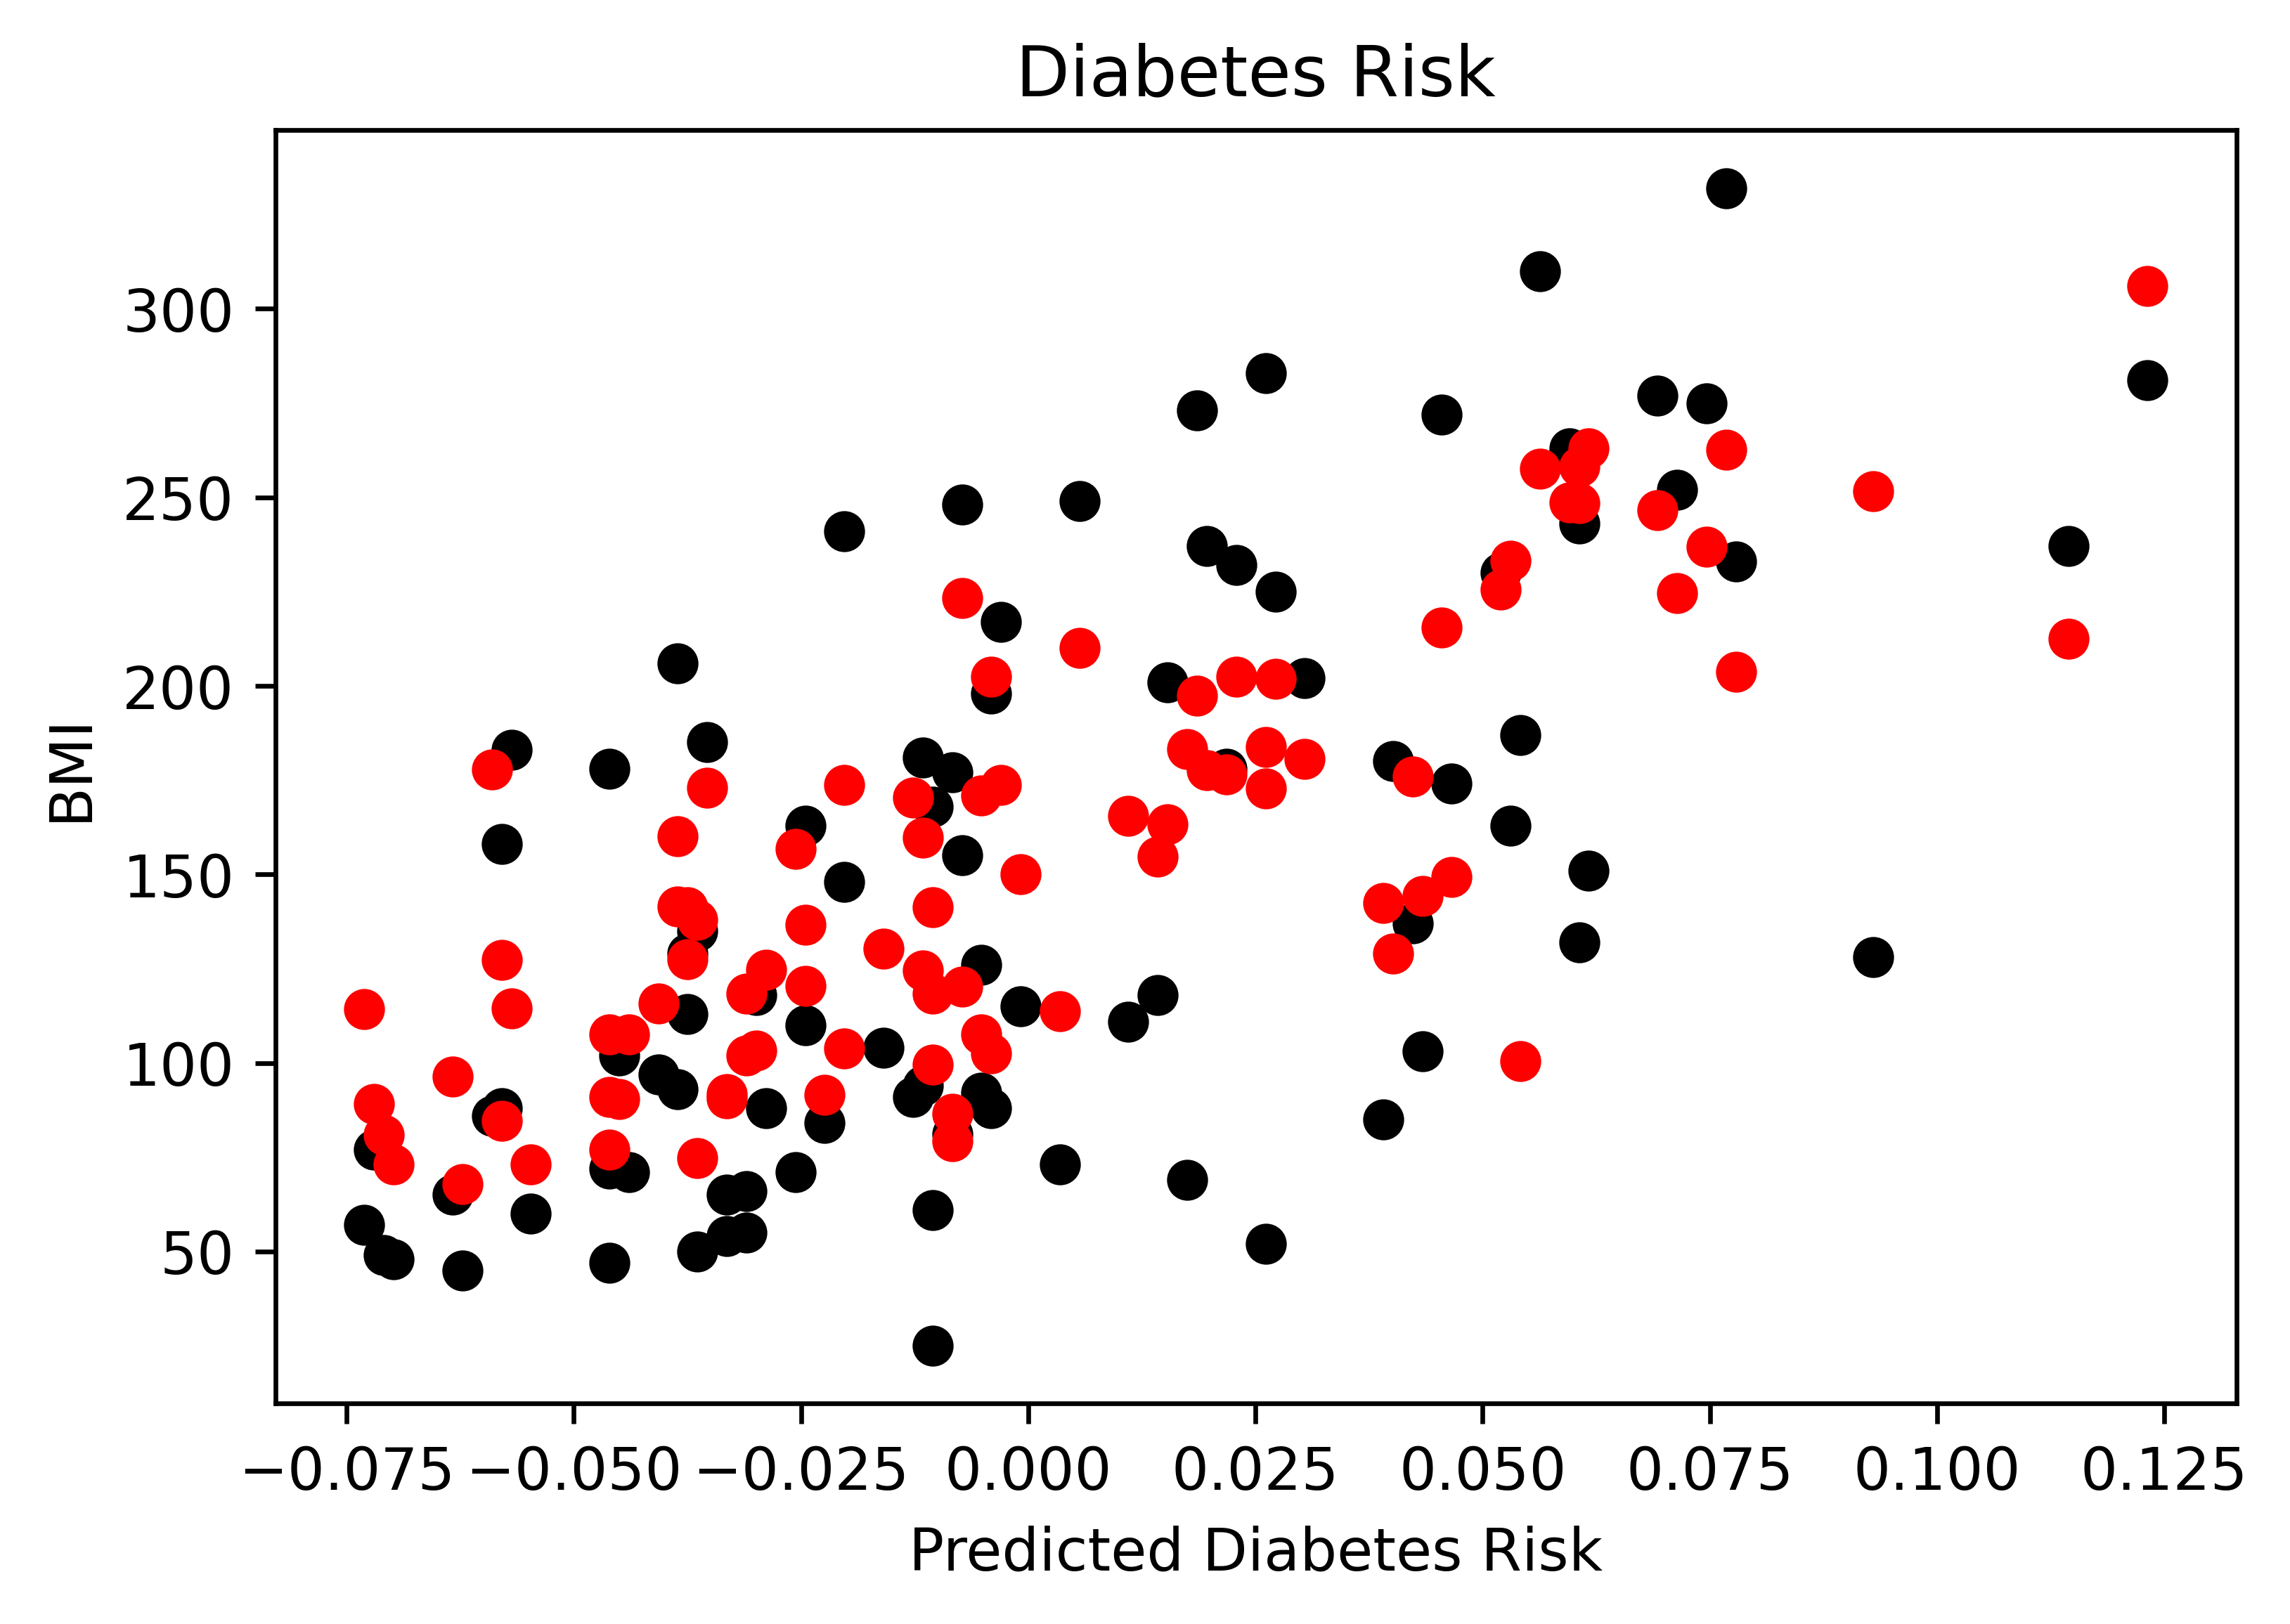

In [28]:
predictions = rf.predict(test_features)


plt.title('Diabetes Risk') 
plt.xlabel('Predicted Diabetes Risk') 
plt.ylabel('BMI') 

plt.scatter(test_features.bmi, test_target, color="black")
plt.scatter(test_features.bmi, predictions, color="red")

In [23]:
errors = abs(predictions - test_target)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'units')

Mean Absolute Error: 44.76 units


In [24]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [25]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = data.feature_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [26]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data.feature_names, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

feature_importances

[('bmi', 0.34),
 ('s5', 0.23),
 ('s6', 0.09),
 ('bp', 0.08),
 ('s3', 0.07),
 ('age', 0.06),
 ('s1', 0.06),
 ('s2', 0.06),
 ('sex', 0.01),
 ('s4', 0.01)]

# Classification

## Import Iris dataset

In [30]:
from sklearn import datasets 
import pandas as pd

iris = datasets.load_iris() 
features = iris.data[:, :2]
target = iris.target

pd_features = pd.DataFrame(features, columns = iris.feature_names[:2])

print(pd_features)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]


In [41]:
type(iris.target)

numpy.ndarray

In [33]:
pd_features['target'] = target
pd_features

sepal length (cm)  sepal width (cm)  target
0                  5.1               3.5       0
1                  4.9               3.0       0
2                  4.7               3.2       0
3                  4.6               3.1       0
4                  5.0               3.6       0
..                 ...               ...     ...
145                6.7               3.0       2
146                6.3               2.5       2
147                6.5               3.0       2
148                6.2               3.4       2
149                5.9               3.0       2

[150 rows x 3 columns]

In [34]:
class_0 = pd_features.query('target==0')
class_1 = pd_features.query('target==1')
class_2 = pd_features.query('target==2')

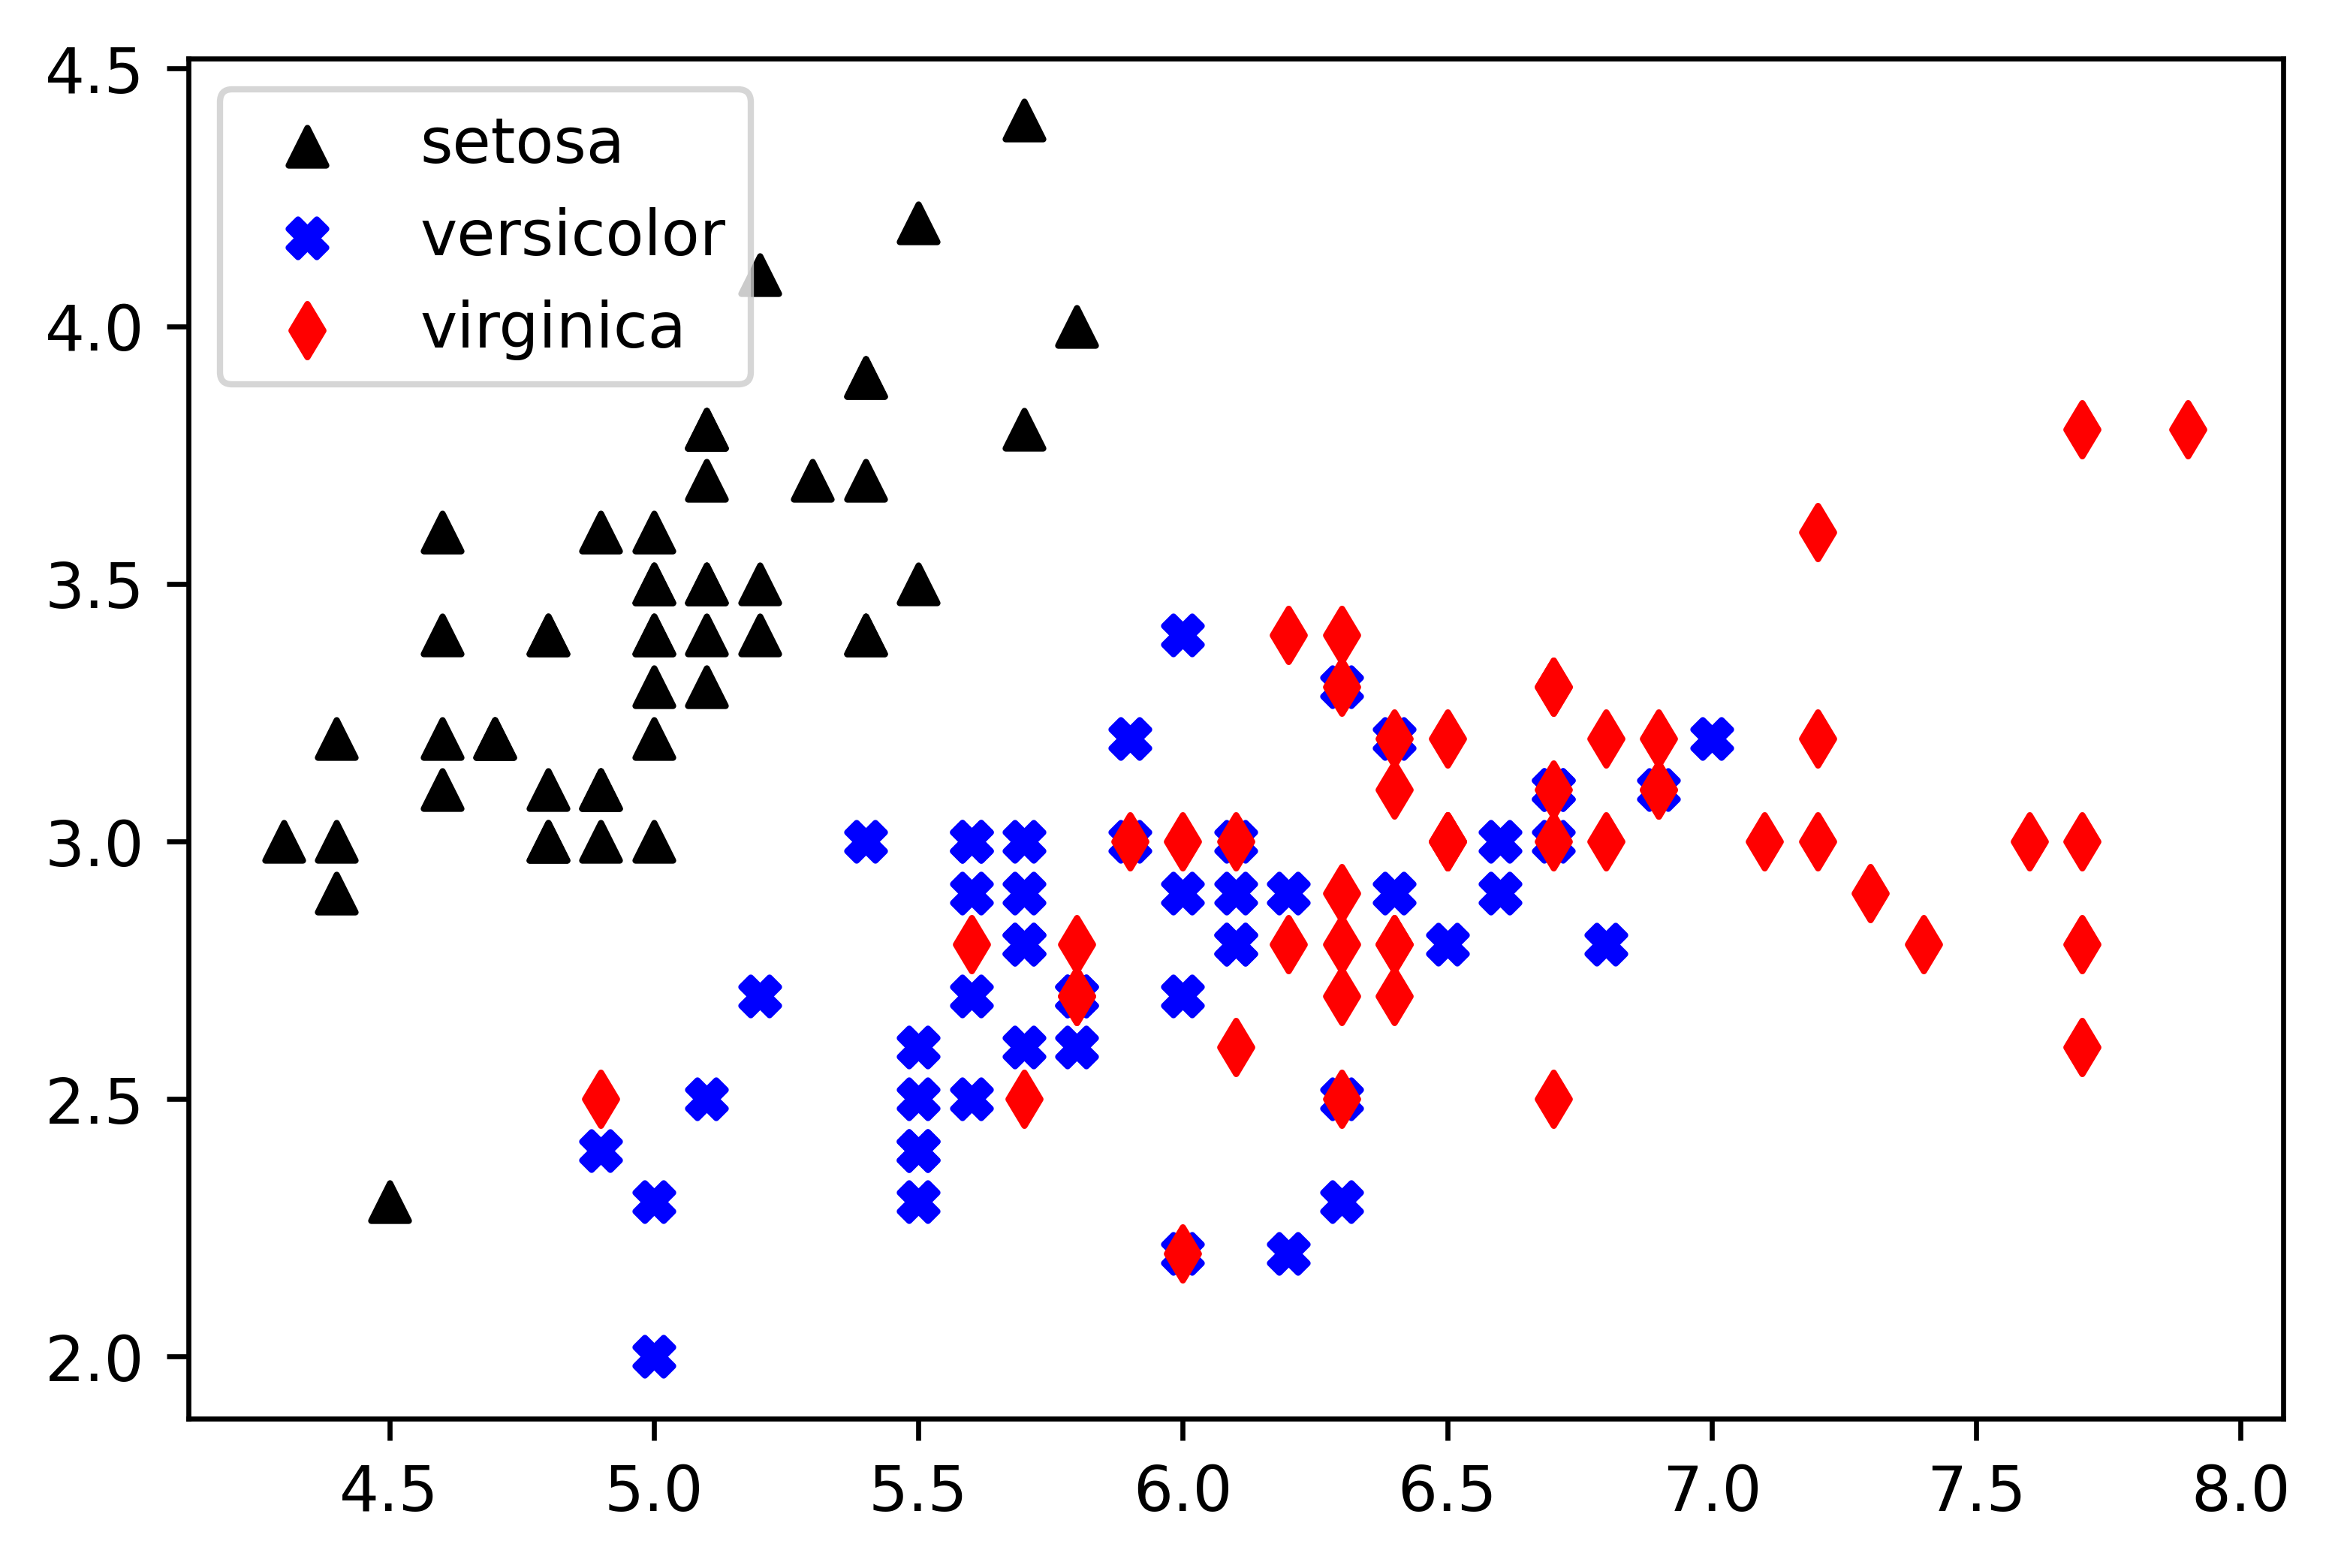

In [35]:
import matplotlib.pyplot as plt
plt.scatter(class_0.iloc[:,0], class_0.iloc[:,1], marker="^", color="black", label="setosa")
plt.scatter(class_1.iloc[:,0], class_1.iloc[:,1], marker="X",  color="blue", label="versicolor")
plt.scatter(class_2.iloc[:,0], class_2.iloc[:,1], marker="d",color="red", label="virginica")
plt.legend(loc="upper left")
plt.show()

In [38]:
pd_features

sepal length (cm)  sepal width (cm)  target
0                  5.1               3.5       0
1                  4.9               3.0       0
2                  4.7               3.2       0
3                  4.6               3.1       0
4                  5.0               3.6       0
..                 ...               ...     ...
145                6.7               3.0       2
146                6.3               2.5       2
147                6.5               3.0       2
148                6.2               3.4       2
149                5.9               3.0       2

[150 rows x 3 columns]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd_features.iloc[:,:2], target, test_size = 0.25, random_state = 0)

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(X_train,y_train)

In [44]:
predictions = classifier.predict(X_test)

X_test['target'] = predictions
X_test

sepal length (cm)  sepal width (cm)  target
114                5.8               2.8       1
62                 6.0               2.2       1
33                 5.5               4.2       0
107                7.3               2.9       2
7                  5.0               3.4       0
100                6.3               3.3       2
40                 5.0               3.5       0
86                 6.7               3.1       2
76                 6.8               2.8       2
71                 6.1               2.8       1
134                6.1               2.6       1
51                 6.4               3.2       2
73                 6.1               2.8       1
54                 6.5               2.8       2
63                 6.1               2.9       1
37                 4.9               3.6       0
78                 6.0               2.9       1
90                 5.5               2.6       1
45                 4.8               3.0       0
16                 5.4               3.9       0
121                5.6               2.8       1
66                 5.6               3.0       1
24                 4.8               3.4       0
8                  4.4               2.9       0
126                6.2               2.8       2
22                 4.6               3.6       0
44                 5.1               3.8       0
97                 6.2               2.9       2
93                 5.0               2.3       1
26                 5.0               3.4       0
137                6.4               3.1       2
84                 5.4               3.0       1
27                 5.2               3.5       0
127                6.1               3.0       2
132                6.4               2.8       2
59                 5.2               2.7       1
18                 5.7               3.8       0
83                 6.0               2.7       1

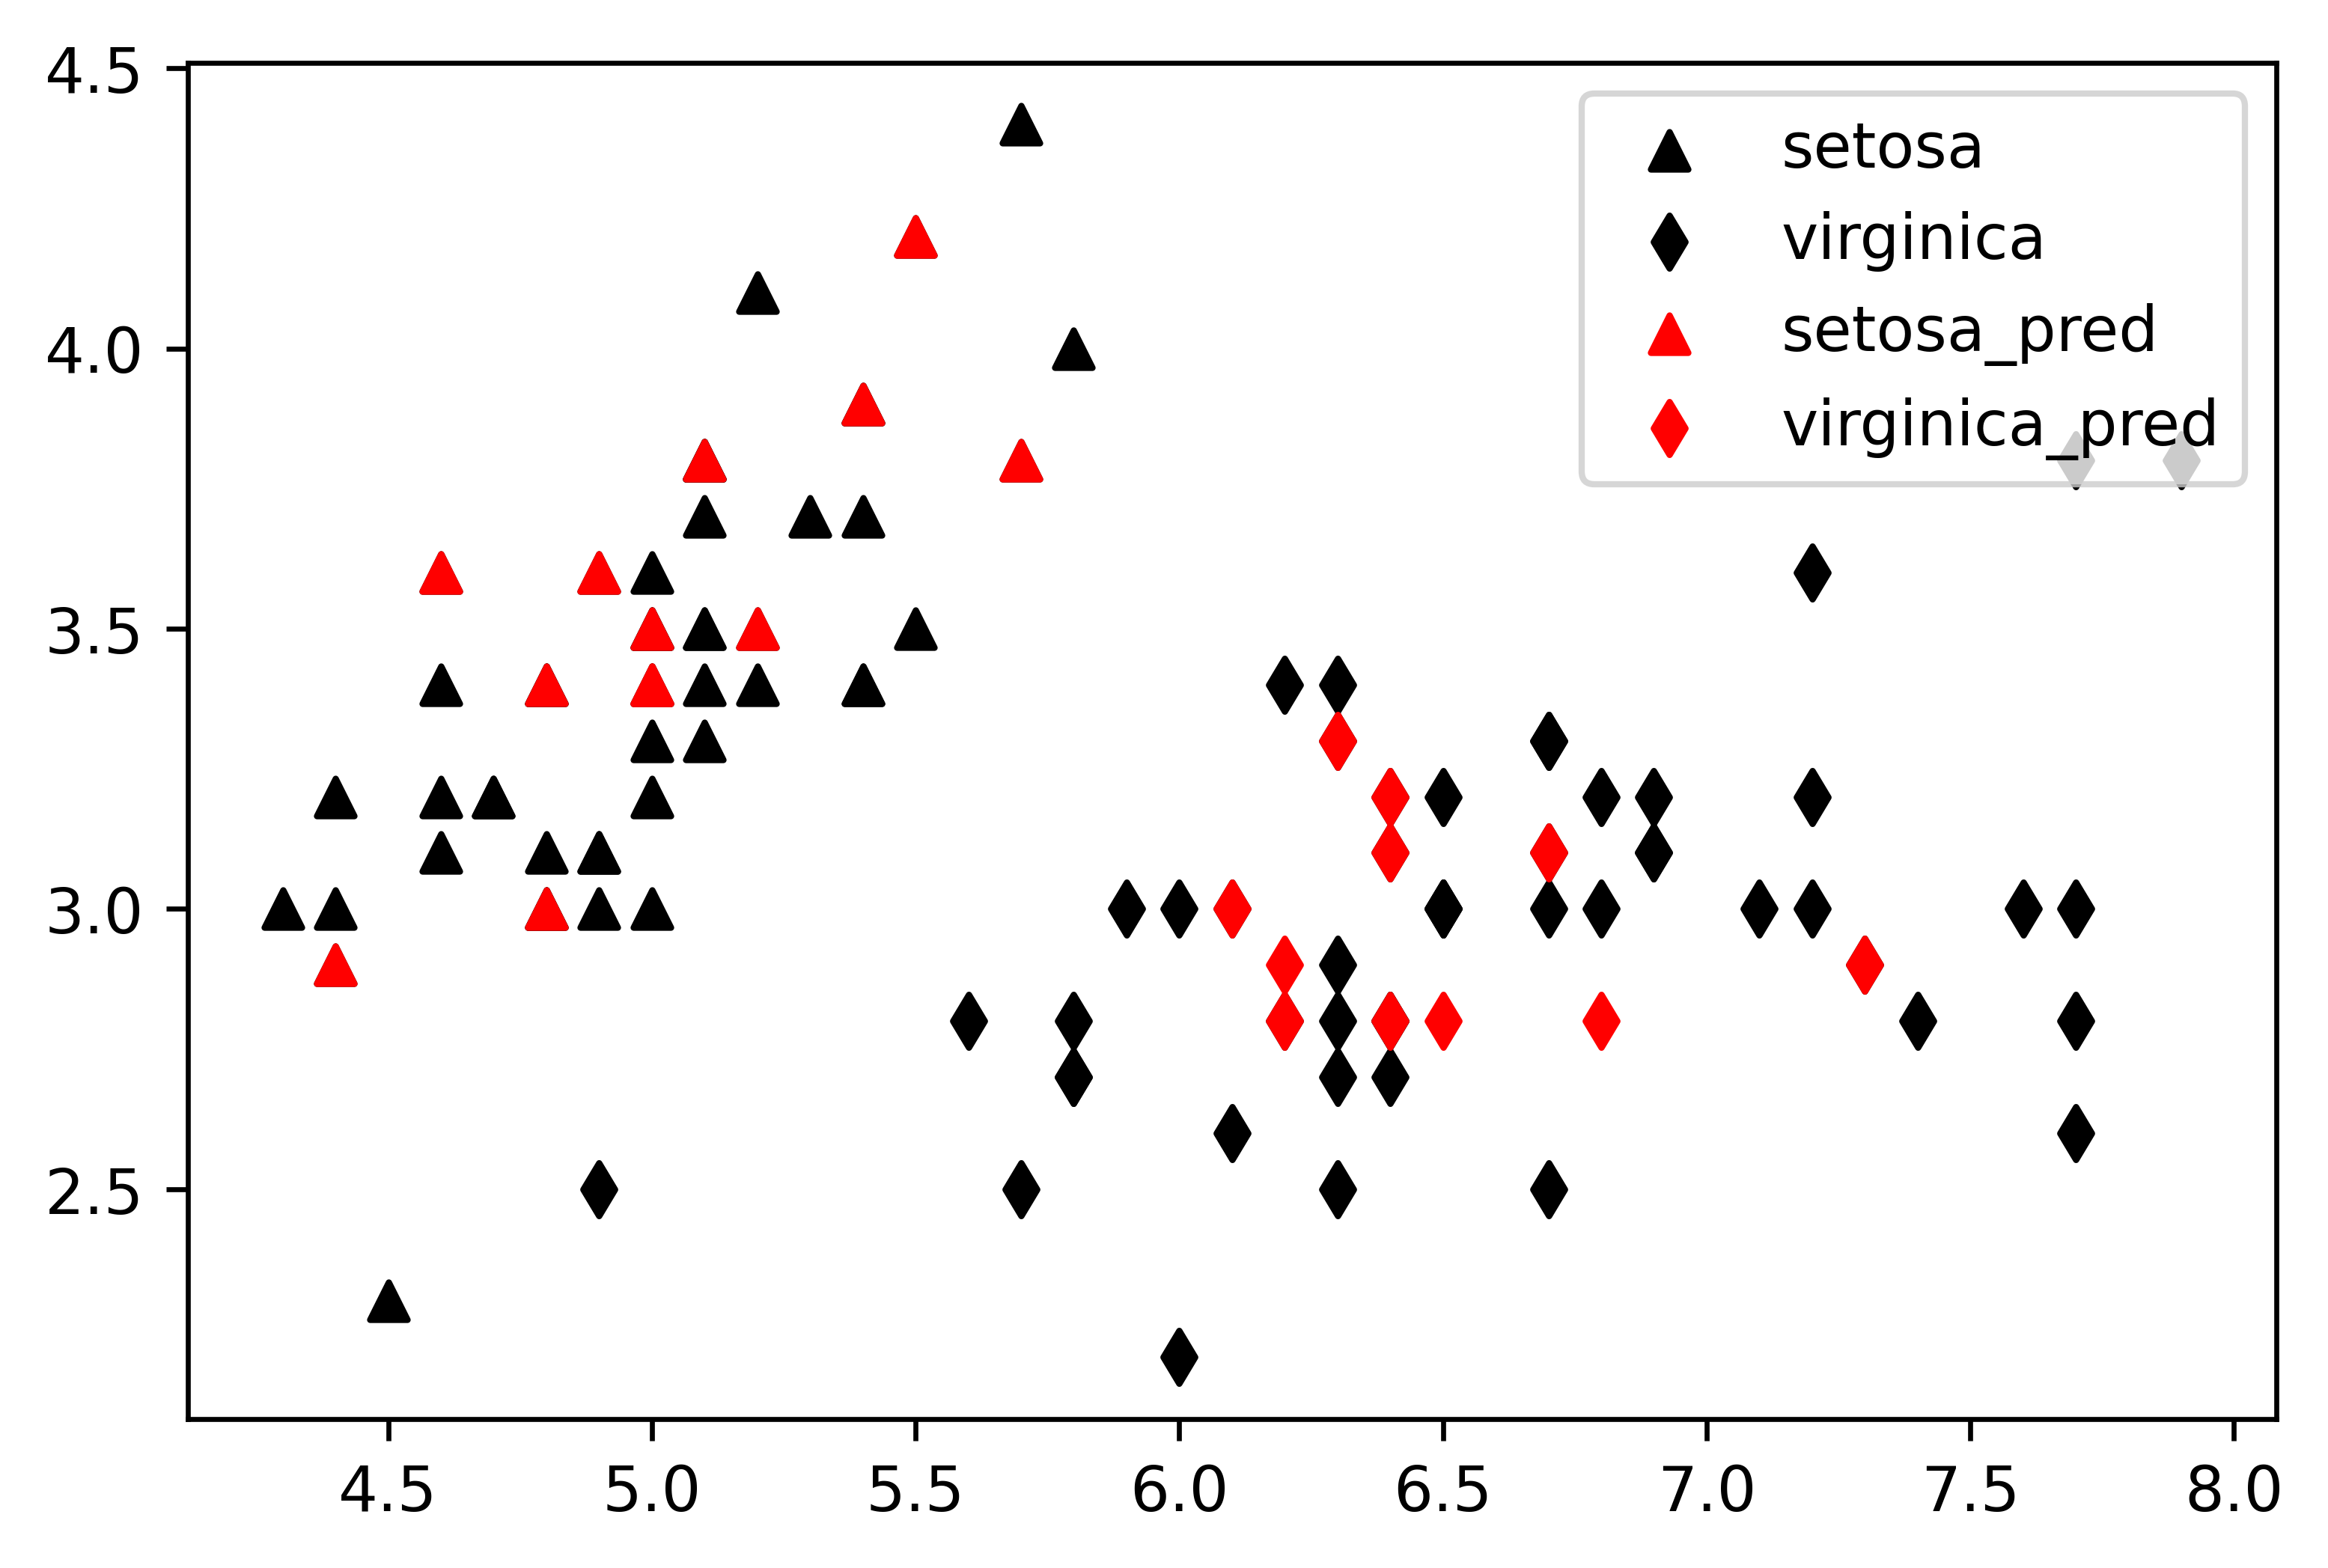

In [45]:
import matplotlib.pyplot as plt

pred_class_0 = X_test.query('target==0')
pred_class_2 = X_test.query('target==2')

plt.scatter(class_0.iloc[:,0], class_0.iloc[:,1], marker="^", color="black", label="setosa")
plt.scatter(class_2.iloc[:,0], class_2.iloc[:,1], marker="d",color="black", label="virginica")

plt.scatter(pred_class_0.iloc[:,0], pred_class_0.iloc[:,1], marker="^", color="red", label="setosa_pred")
plt.scatter(pred_class_2.iloc[:,0], pred_class_2.iloc[:,1], marker="d",color="red", label="virginica_pred")


plt.legend()
plt.show()

## One Class SVM

### Create toy dataset

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

X = 0.2 * np.random.randn(50, 2)
X_train = np.r_[X + 3]
# Generate some regular novel observations
X = 0.2 * np.random.randn(20, 2)
X_test = np.r_[X + 3]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-5, high=5, size=(20, 2))

In [47]:
from sklearn import svm

one_svm = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
one_svm.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.1)

In [48]:
y_pred_train = one_svm.predict(X_train)
y_pred_test = one_svm.predict(X_test)
y_pred_outliers = one_svm.predict(X_outliers)
print(y_pred_train[y_pred_train == -1].size)
print(y_pred_test[y_pred_test == -1].size)
print(y_pred_outliers[y_pred_outliers == 1].size)

4
2
0


### Plot one-class SVM

In [49]:
X_outliers

array([[ 1.50271108, -2.75442609],
       [-3.29101545, -0.66465184],
       [-2.31443768, -1.32868688],
       [-2.91872285,  3.88462945],
       [ 0.8928086 , -1.84991637],
       [-3.57860664, -4.52845733],
       [ 2.46639876,  3.47182145],
       [-0.37274098, -1.46383119],
       [-4.36234609,  1.17638826],
       [ 3.15005668,  4.69980074],
       [ 3.94246827, -1.17222084],
       [ 0.74913189,  0.11314885],
       [ 2.23848461,  3.9228681 ],
       [ 4.94741367,  1.94194745],
       [-2.04296632, -2.01888744],
       [-2.43007616,  3.72449243],
       [-3.69246452, -1.68757867],
       [-3.65625519,  3.18390539],
       [ 0.56993096, -0.23082702],
       [ 3.74368322, -3.64119413]])

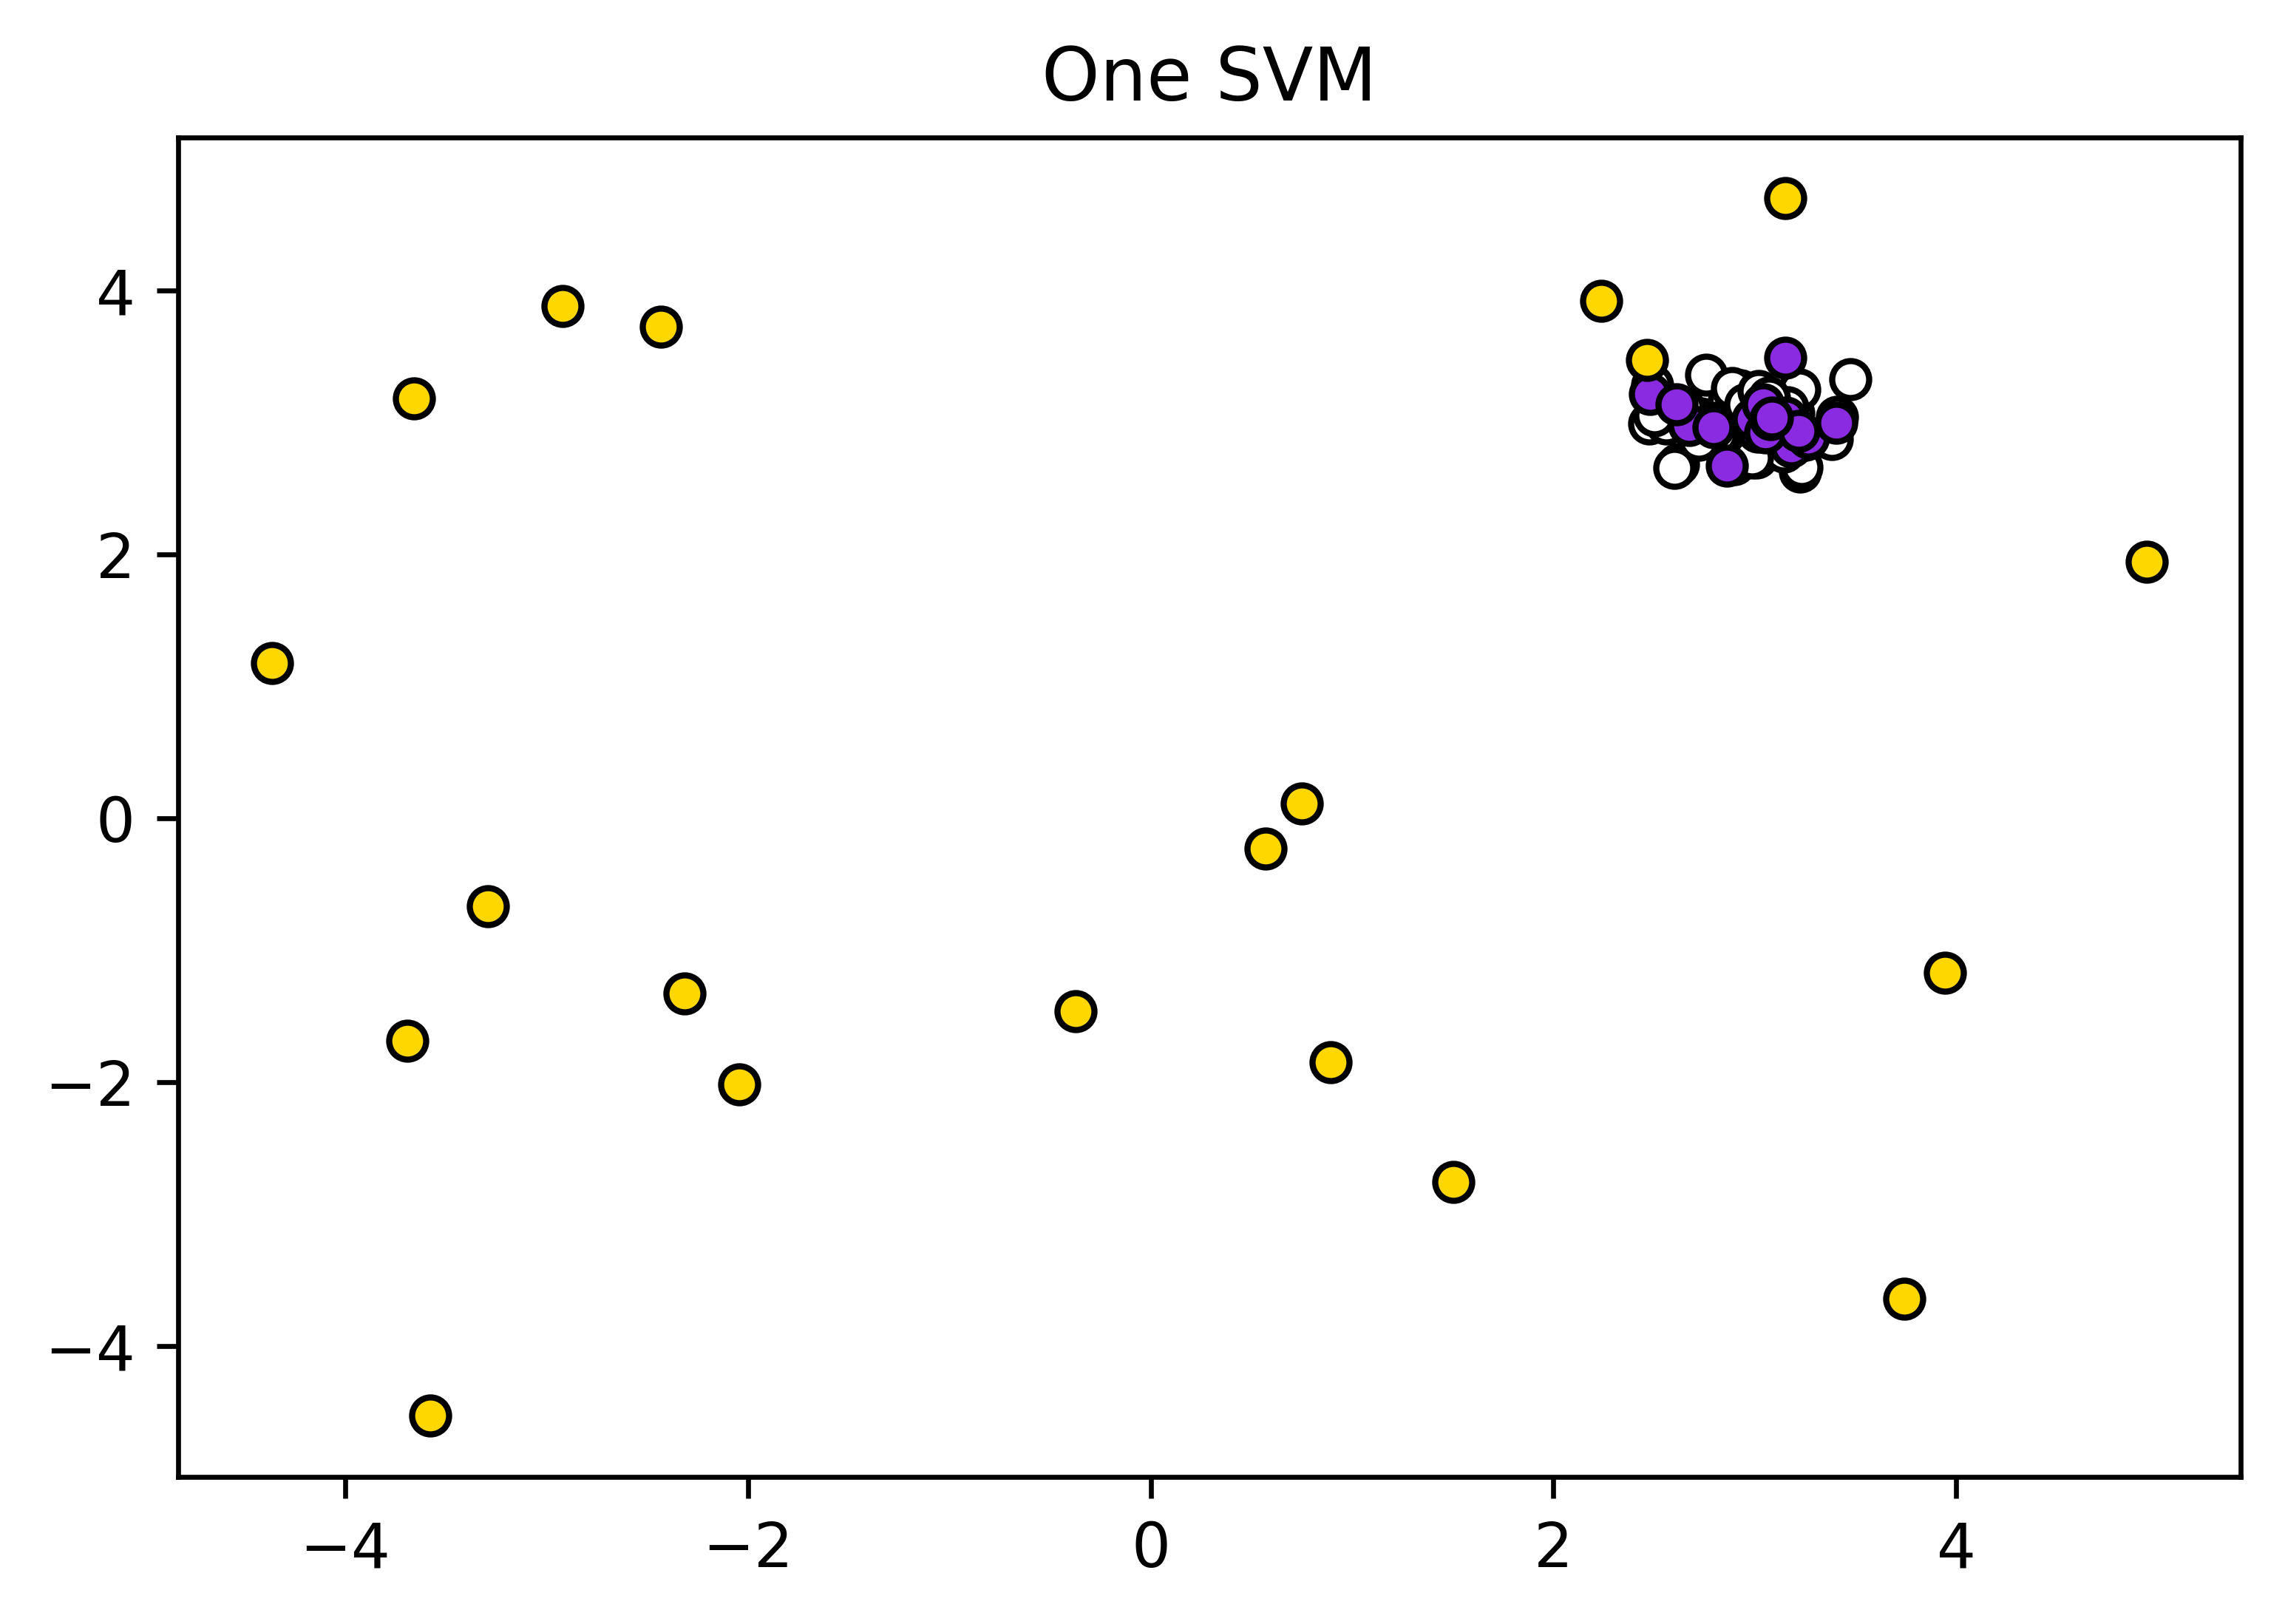

In [50]:
import matplotlib.pyplot as plt

plt.title("One SVM")


plt.scatter(X_train[:, 0], X_train[:, 1], c="white",  edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet",  edgecolors="k")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", edgecolors="k")

In [52]:
print(X_outliers.shape)
print(y_pred_outliers.shape)

(20, 2)
(20,)


In [53]:
np.delete(X_outliers, [:2],0)

SyntaxError: invalid syntax (3635757794.py, line 1)

In [54]:
X_outliers = np.column_stack((X_outliers, y_pred_outliers))
X_outliers

array([[ 1.50271108, -2.75442609, -1.        ],
       [-3.29101545, -0.66465184, -1.        ],
       [-2.31443768, -1.32868688, -1.        ],
       [-2.91872285,  3.88462945, -1.        ],
       [ 0.8928086 , -1.84991637, -1.        ],
       [-3.57860664, -4.52845733, -1.        ],
       [ 2.46639876,  3.47182145, -1.        ],
       [-0.37274098, -1.46383119, -1.        ],
       [-4.36234609,  1.17638826, -1.        ],
       [ 3.15005668,  4.69980074, -1.        ],
       [ 3.94246827, -1.17222084, -1.        ],
       [ 0.74913189,  0.11314885, -1.        ],
       [ 2.23848461,  3.9228681 , -1.        ],
       [ 4.94741367,  1.94194745, -1.        ],
       [-2.04296632, -2.01888744, -1.        ],
       [-2.43007616,  3.72449243, -1.        ],
       [-3.69246452, -1.68757867, -1.        ],
       [-3.65625519,  3.18390539, -1.        ],
       [ 0.56993096, -0.23082702, -1.        ],
       [ 3.74368322, -3.64119413, -1.        ]])

In [55]:
df = pd.DataFrame(X_outliers, columns= ['x','y','anomaly_value'])
df

x         y  anomaly_value
0   1.502711 -2.754426           -1.0
1  -3.291015 -0.664652           -1.0
2  -2.314438 -1.328687           -1.0
3  -2.918723  3.884629           -1.0
4   0.892809 -1.849916           -1.0
5  -3.578607 -4.528457           -1.0
6   2.466399  3.471821           -1.0
7  -0.372741 -1.463831           -1.0
8  -4.362346  1.176388           -1.0
9   3.150057  4.699801           -1.0
10  3.942468 -1.172221           -1.0
11  0.749132  0.113149           -1.0
12  2.238485  3.922868           -1.0
13  4.947414  1.941947           -1.0
14 -2.042966 -2.018887           -1.0
15 -2.430076  3.724492           -1.0
16 -3.692465 -1.687579           -1.0
17 -3.656255  3.183905           -1.0
18  0.569931 -0.230827           -1.0
19  3.743683 -3.641194           -1.0

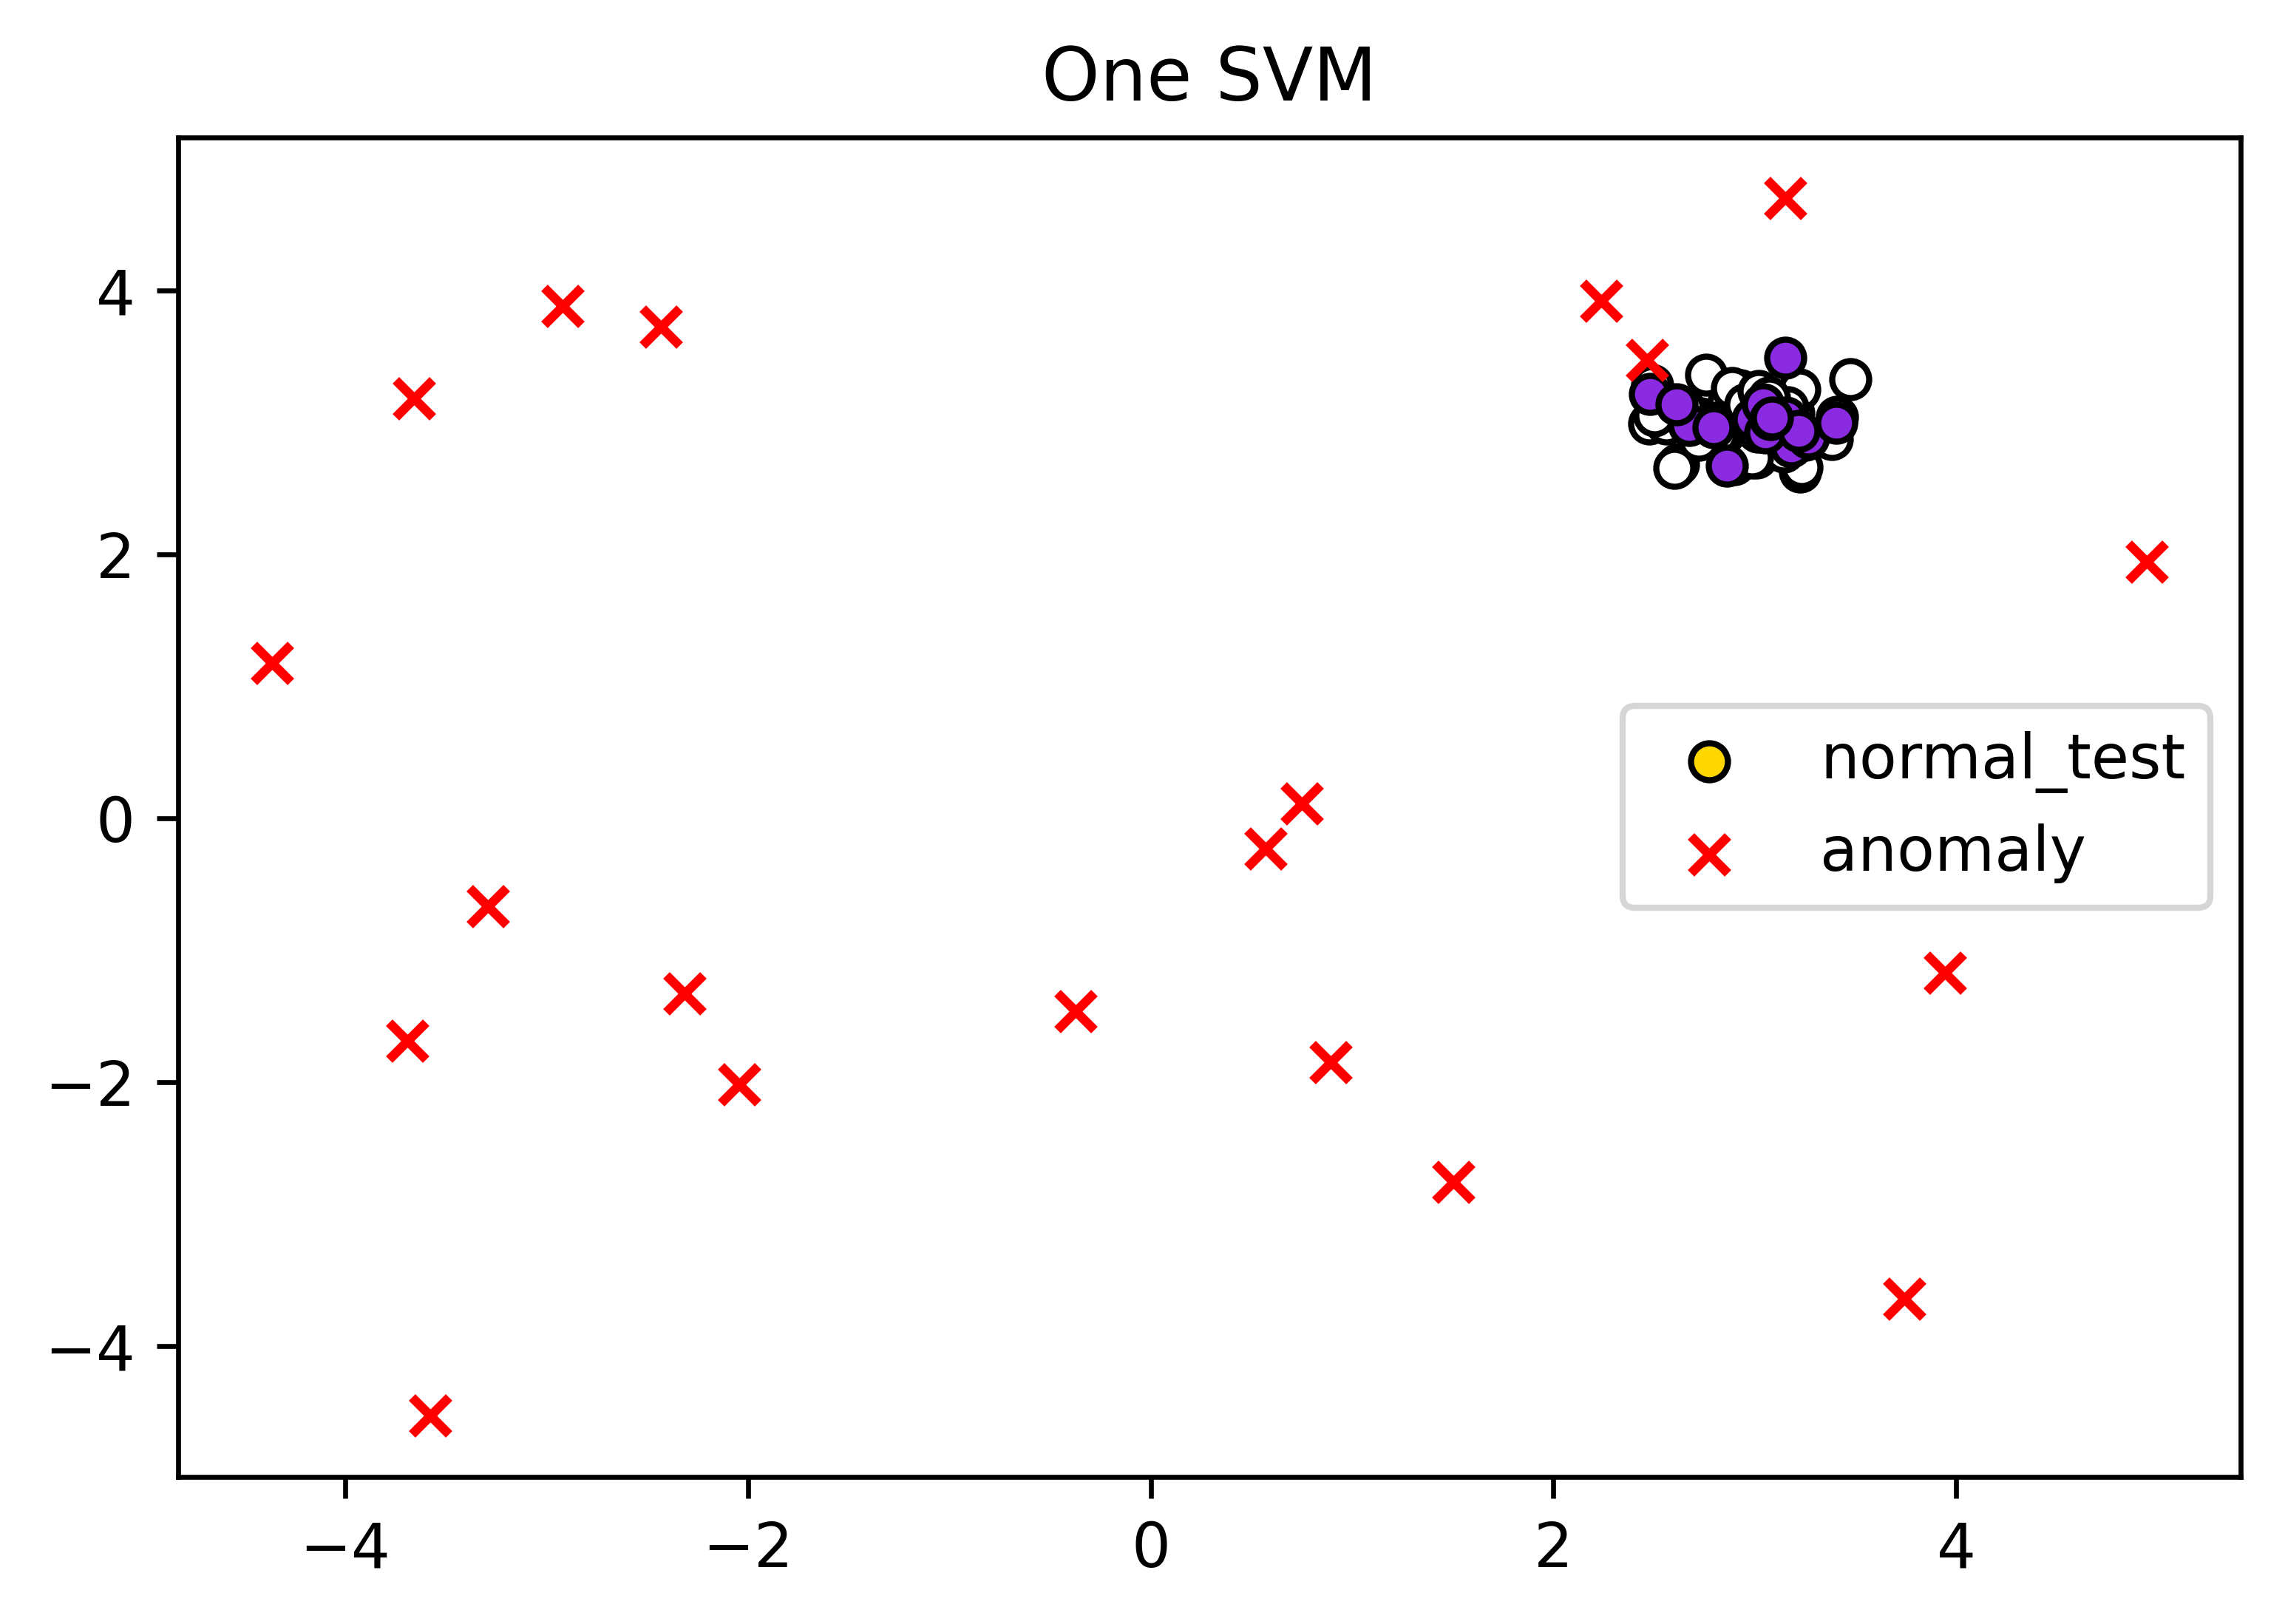

In [56]:
valid = df.query('anomaly_value == 1')
anomaly = df.query('anomaly_value == -1')

plt.title("One SVM")

plt.scatter(X_train[:, 0], X_train[:, 1], c="white",  edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet",  edgecolors="k")
plt.scatter(valid.iloc[:, 0], valid.iloc[:, 1], c="gold", edgecolors="k", label="normal_test")
plt.scatter(anomaly.iloc[:, 0], anomaly.iloc[:,  1], marker="x",color="red", label="anomaly")

plt.legend()
plt.show()

## Isolation Forests

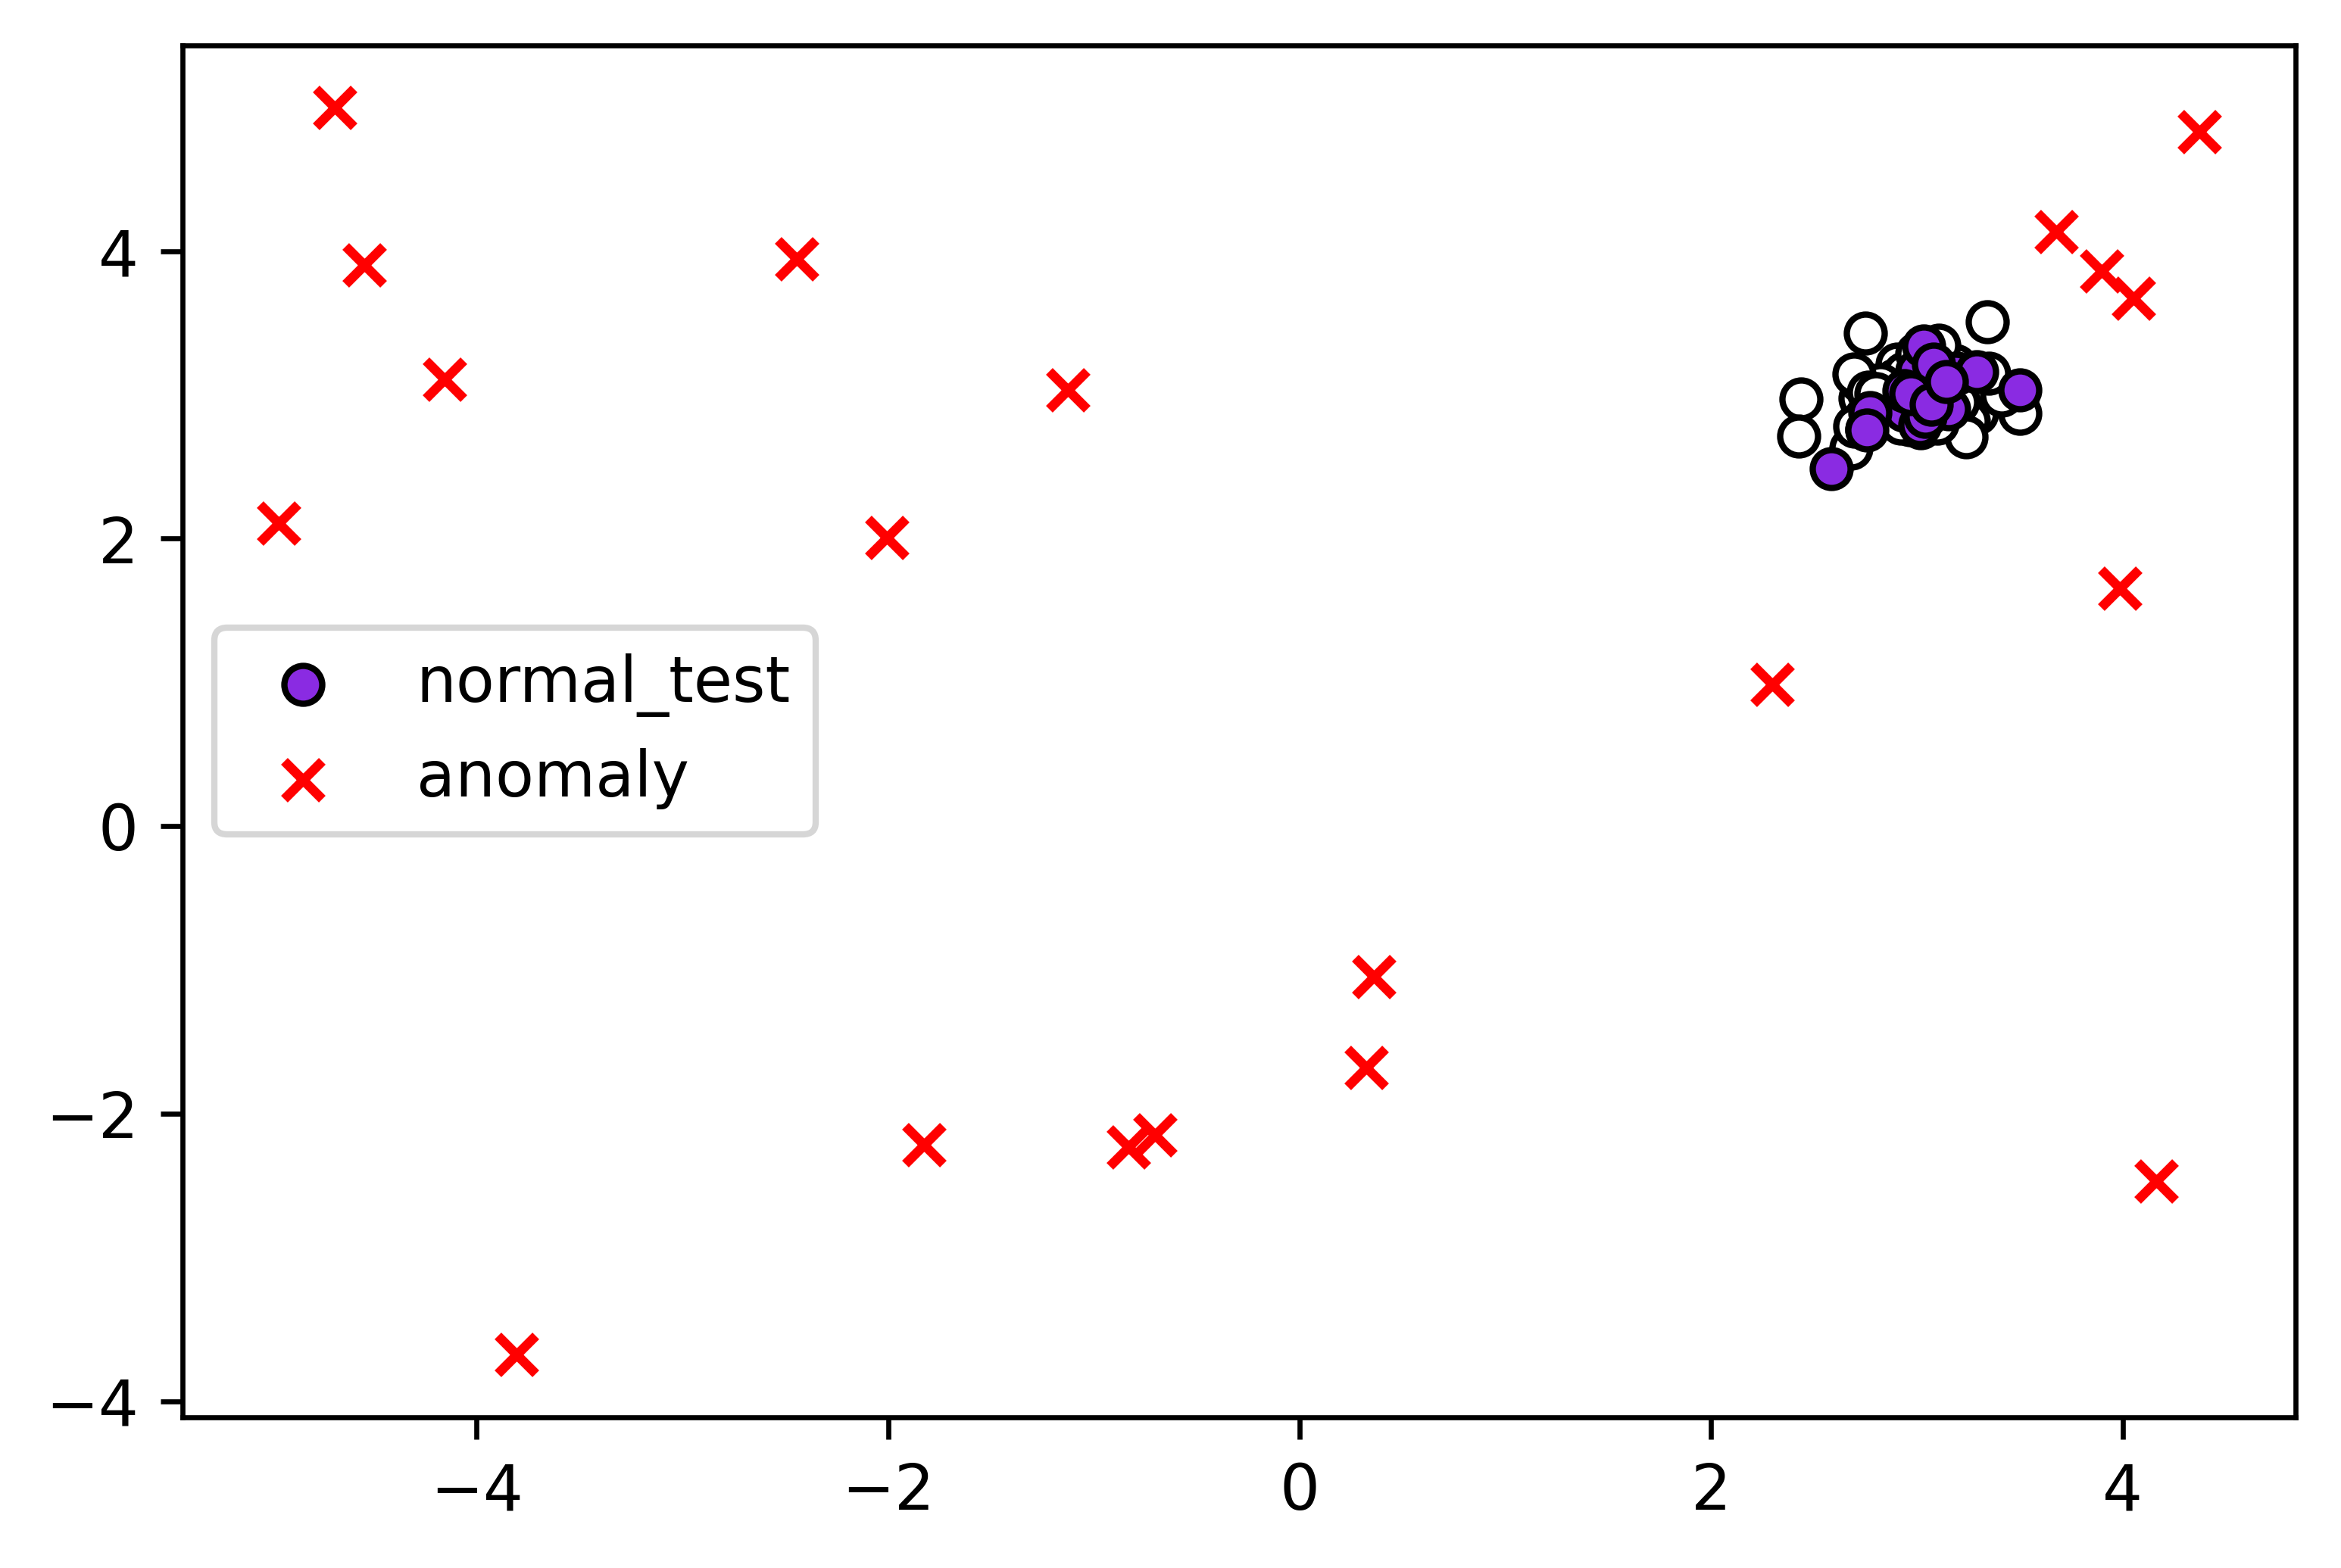

In [57]:
X = 0.2 * np.random.randn(50, 2)
X_train = np.r_[X + 3]
X = 0.2 * np.random.randn(20, 2)
X_test = np.r_[X + 3]
X_outliers = np.random.uniform(low=-5, high=5, size=(20, 2))

plt.scatter(X_train[:, 0], X_train[:, 1], c="white",  edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet",  edgecolors="k", label="normal_test")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", marker='x', label="anomaly")

plt.legend()
plt.show()

In [58]:
from sklearn.ensemble import IsolationForest

isolForest = IsolationForest(n_estimators=300, random_state=800)
isolForest.fit(X_train)

y_pred_train = isolForest.predict(X_train)
y_pred_test = isolForest.predict(X_test)
y_pred_outliers = isolForest.predict(X_outliers)

y_pred_outliers[(y_pred_outliers[:]>0)].shape

(0,)

In [59]:
full_test_outliers = np.column_stack((X_outliers, y_pred_outliers))
print(full_test_outliers)

[[ 3.67910065  4.1364568  -1.        ]
 [-3.80511437 -3.67760823 -1.        ]
 [ 3.89844229  3.85950233 -1.        ]
 [-1.82534609 -2.21611429 -1.        ]
 [-0.83304899 -2.2309365  -1.        ]
 [-1.12571983  3.03354276 -1.        ]
 [ 2.2982647   0.98339322 -1.        ]
 [-4.69047448  4.9993294  -1.        ]
 [ 4.05255129  3.67308617 -1.        ]
 [-4.96224015  2.10534693 -1.        ]
 [ 0.32393048 -1.68095577 -1.        ]
 [-2.00473735  2.00709546 -1.        ]
 [-4.15701112  3.10842213 -1.        ]
 [ 4.16534665 -2.47053355 -1.        ]
 [ 0.36150612 -1.04774804 -1.        ]
 [ 3.98523673  1.65250007 -1.        ]
 [ 4.37484288  4.83283709 -1.        ]
 [-2.4438049   3.94609369 -1.        ]
 [-4.54558592  3.9039973  -1.        ]
 [-0.70157857 -2.14612004 -1.        ]]


In [60]:
normal = full_test_outliers[(full_test_outliers[:,2] > 0)]
anomaly = full_test_outliers[(full_test_outliers[:,2] < 0)]
# full_train.sort(axis=0)
# print(full_train.sort())

# valid.sort(axis=0)
# anomaly.sort(axis=0)

print(normal.shape)
print(anomaly.shape)

(0, 3)
(20, 3)


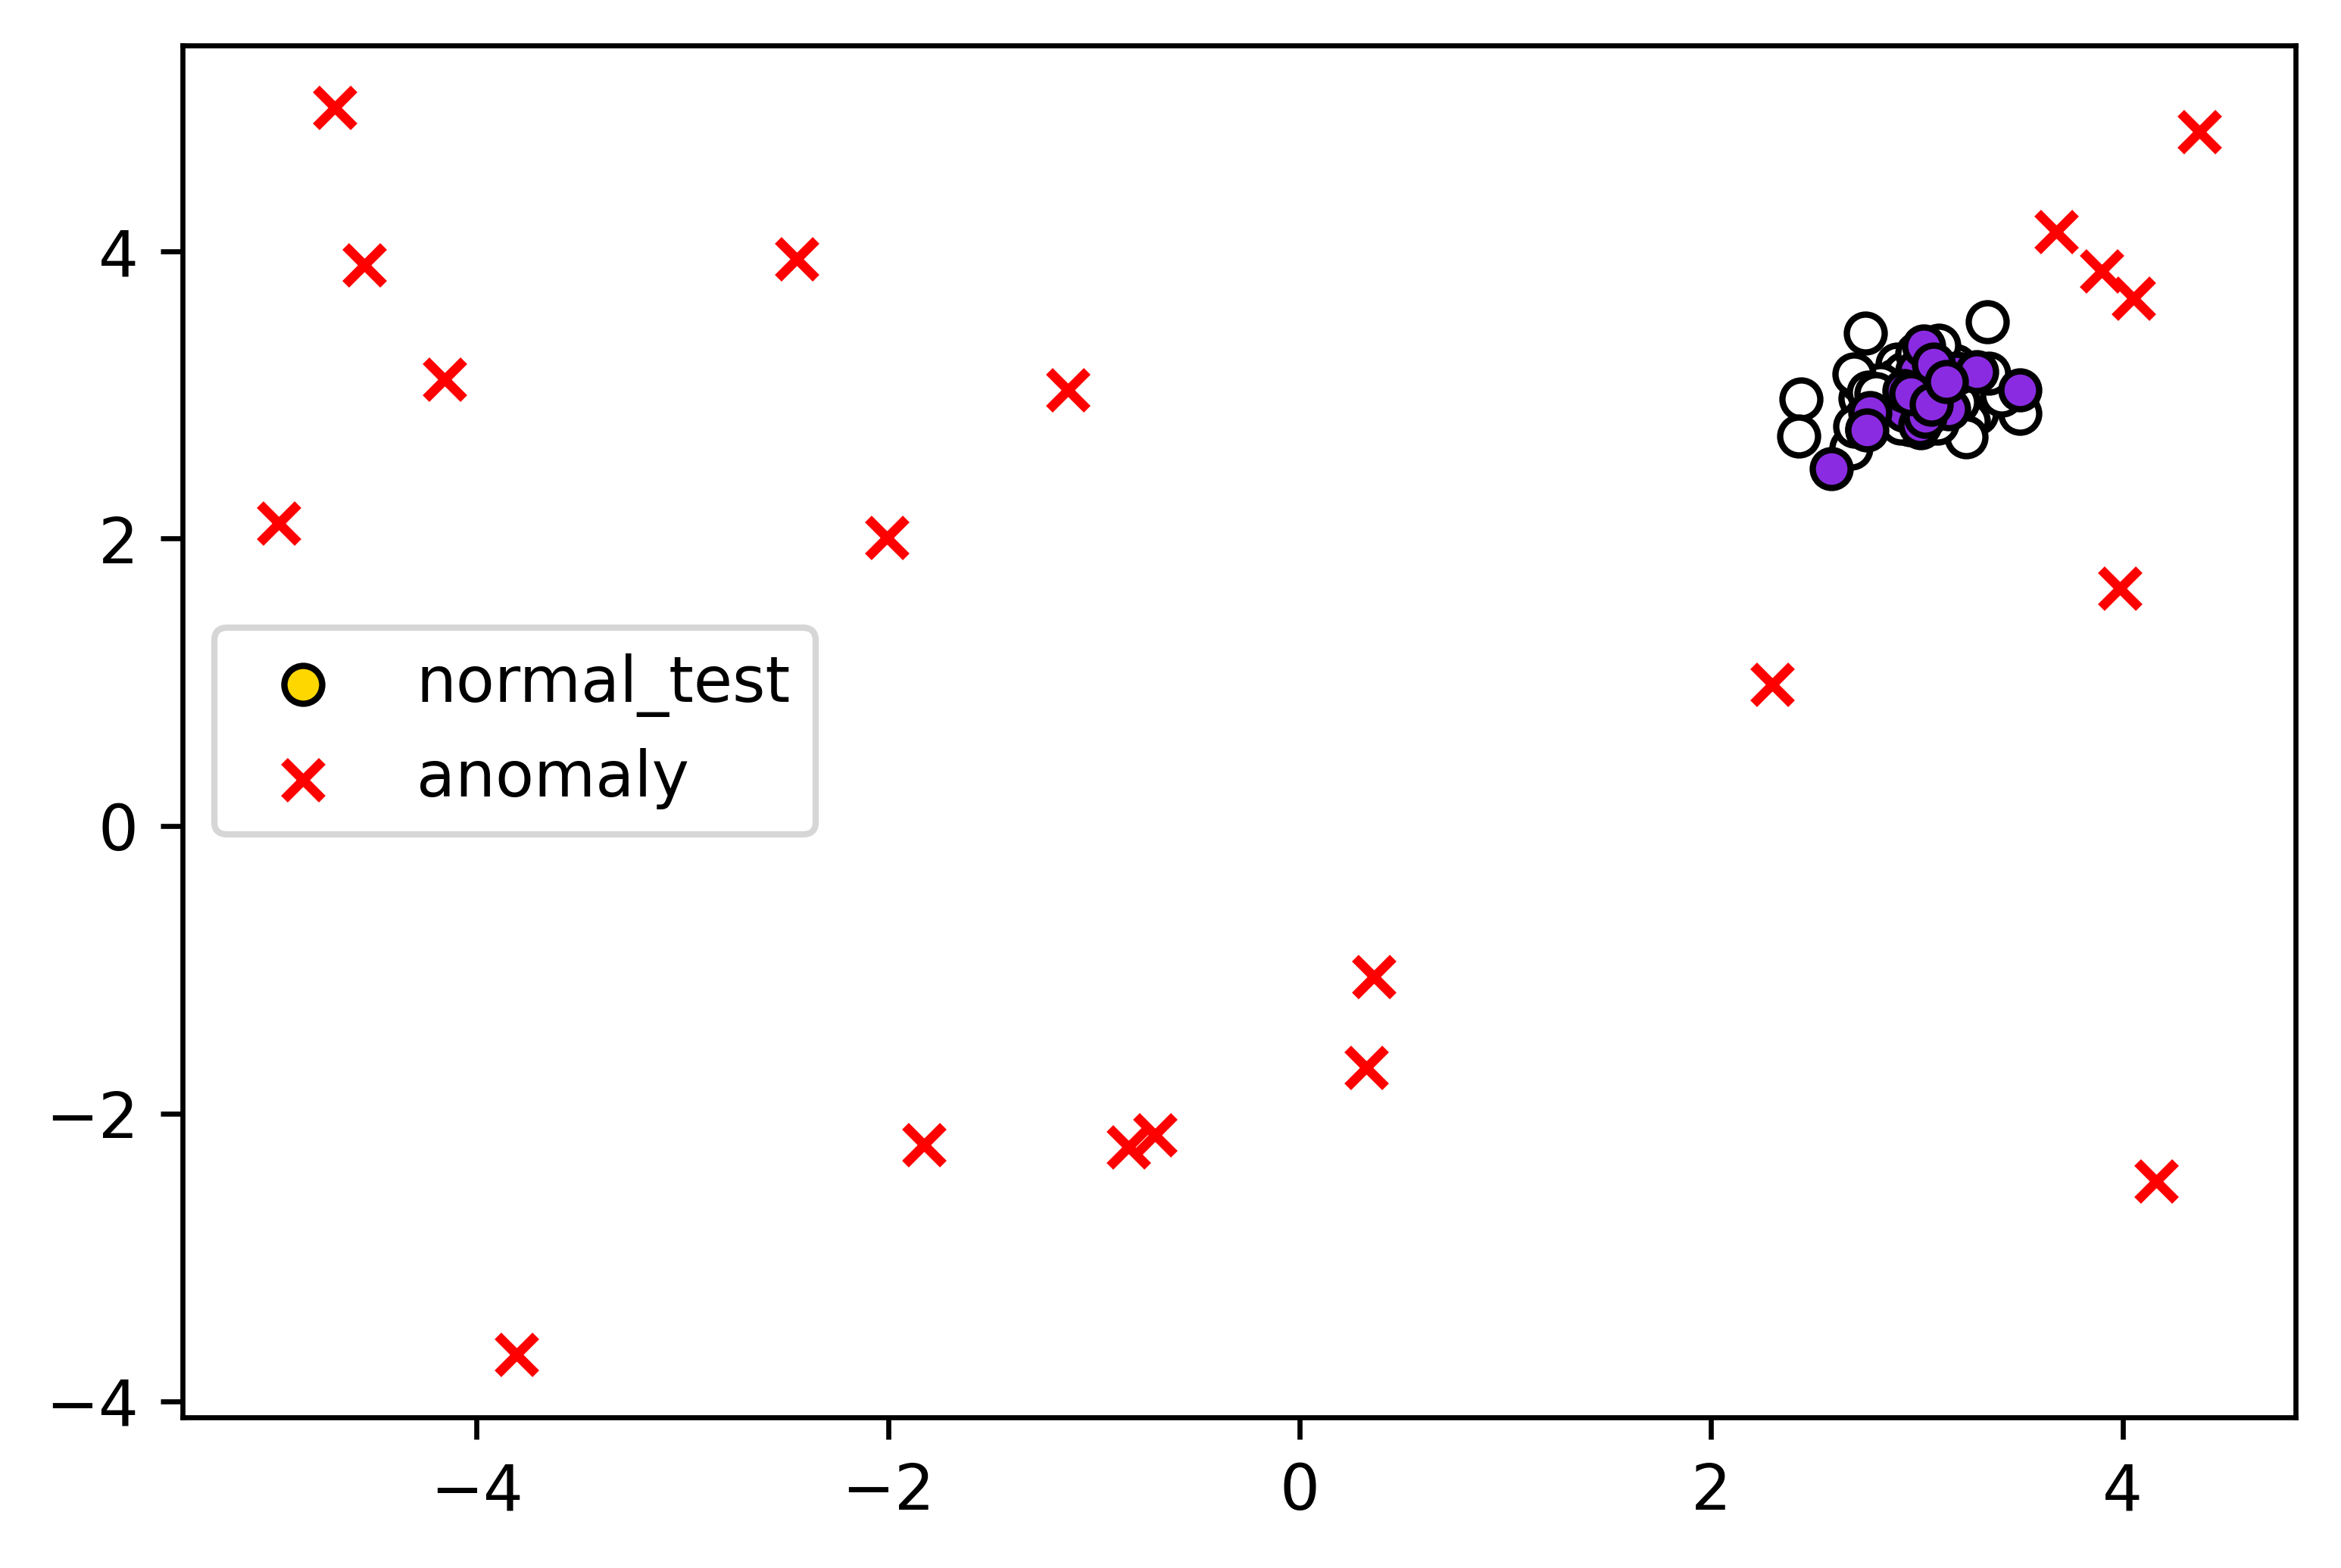

In [61]:
plt.scatter(X_train[:, 0], X_train[:, 1], c="white",  edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet",  edgecolors="k")
plt.scatter(normal[:, 0], normal[:, 1], c="gold", edgecolors="k", label="normal_test")
plt.scatter(anomaly[:, 0], anomaly[:,  1], marker="x",color="red", label="anomaly")


plt.legend()
plt.show()

## Clustering

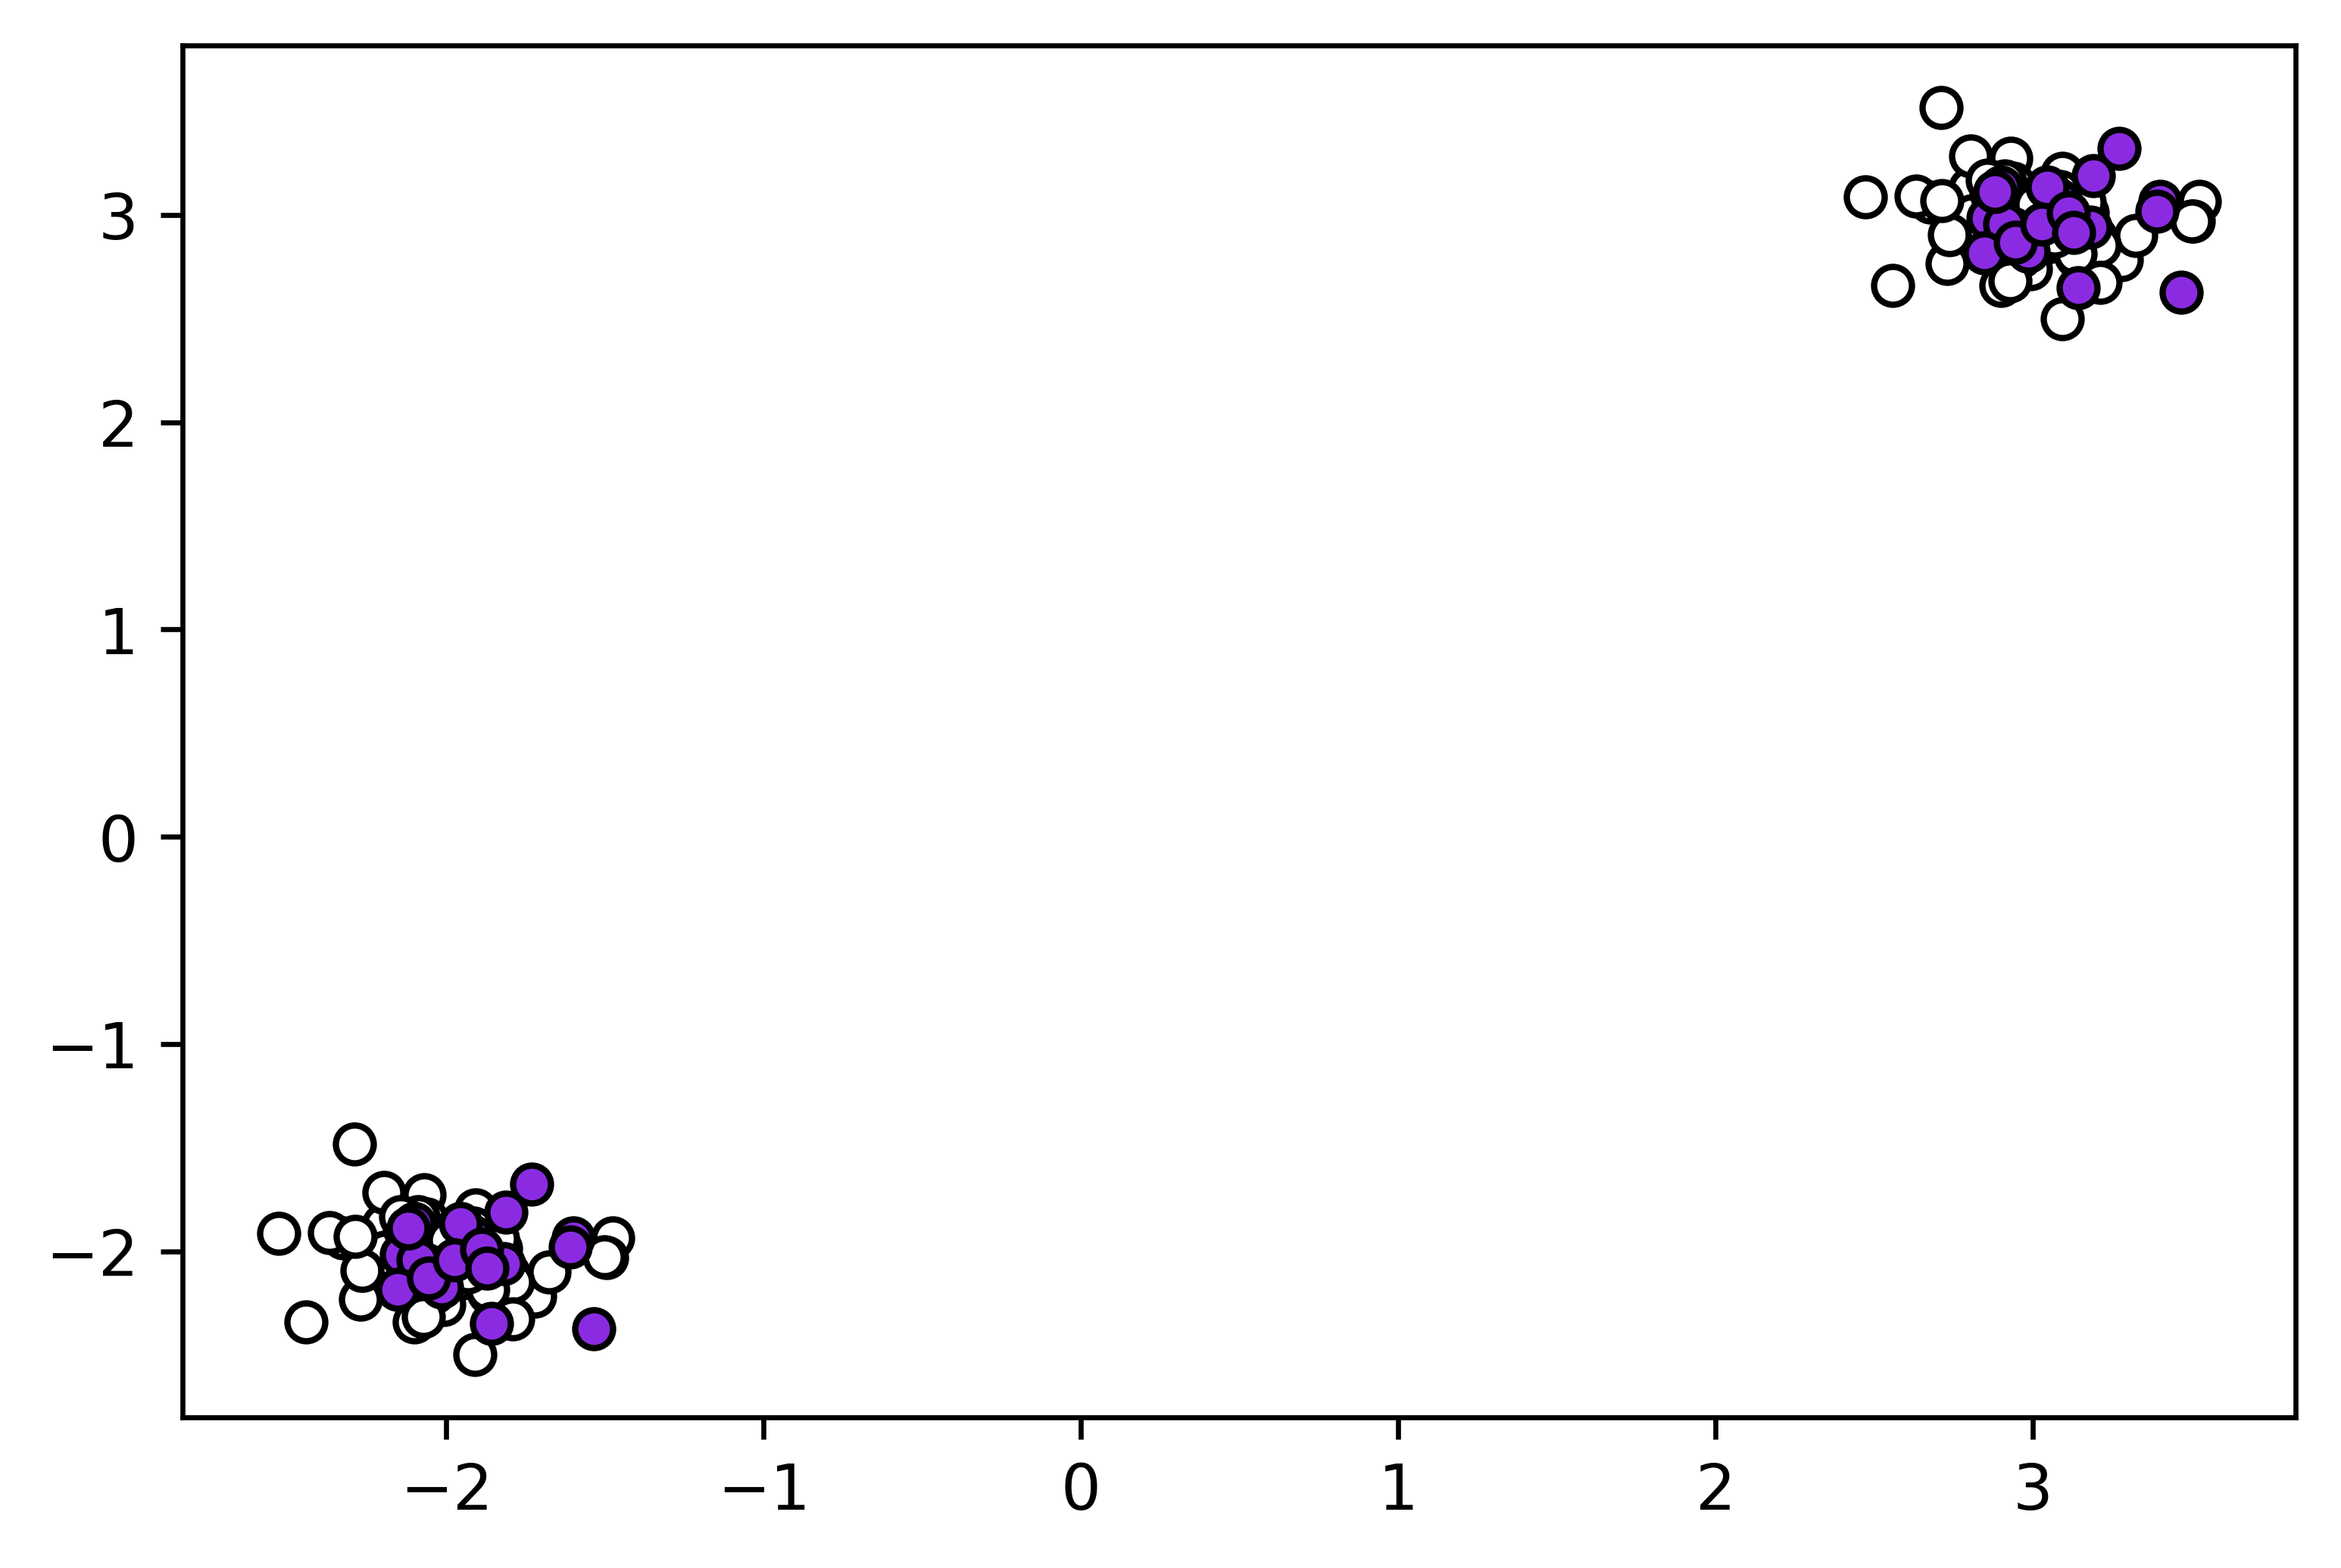

In [62]:
X = 0.2 * np.random.randn(50, 2)
X_train = np.r_[X - 2 , X + 3]
X = 0.2 * np.random.randn(20, 2)
X_test = np.r_[X - 2, X + 3]

plt.scatter(X_train[:, 0], X_train[:, 1], c="white",  edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet",  edgecolors="k")

# plt.legend()
plt.show()

In [63]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
db

DBSCAN(eps=0.3, min_samples=10)